In [78]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.naive_bayes import BernoulliNB as BNB
from sklearn.metrics import accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns

In [2]:
# Reading the CSV file "diabetic_data.csv" into a Pandas DataFrame
data_f = pd.read_csv("diabetic_data.csv") 

In [3]:
data_f.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [4]:
data_f

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [5]:
unique_values = data_f.nunique() # checking unique values
unique_values

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [6]:
data_f['weight'].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [7]:
data_f['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [8]:
data_f['payer_code'].unique()

array(['?', 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM', 'CM',
       'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

In [9]:
data_f['medical_specialty'].unique()

array(['Pediatrics-Endocrinology', '?', 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRe

In [10]:
data_f['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [11]:
data_f.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [12]:
columns_to_be_dropped = ['encounter_id','admission_source_id','payer_code', 'number_outpatient', 'number_inpatient']

In [13]:
data_f["readmitted"].unique()

array(['NO', '>30', '<30'], dtype=object)

In [14]:
# checking the value counts of readmitted column
c=0
for i in data_f['readmitted']:
    if(i == 'NO'):
        c=c+1
print(c)

54864


# Converting Intervals to Value

In [15]:
# The age is in intervals so we converted it to the upper bound
def extract_upper_bound(interval):
    return int(interval.split('-')[1][:-1])

data_f['age'] = data_f['age'].apply(extract_upper_bound)
data_f

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,10,?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,20,?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,30,?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,40,?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,50,?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,80,?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,90,?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,80,?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,90,?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


# Filtering Unique Patients (Removing Duplicates)

In [16]:
data_f.patient_nbr.nunique()

71518

In [17]:
data_f.patient_nbr.value_counts()

88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64

In [18]:
# Removing duplicates to keep one record per patient.
data_f.drop_duplicates(['patient_nbr'], keep = 'last', inplace = True)
data_f

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,10,?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,20,?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,30,?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,40,?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,50,?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,80,?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,90,?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,80,?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,90,?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


# Drop Irrelevant Columns

In [19]:
columns_to_be_dropped = ['patient_nbr','encounter_id','admission_source_id','payer_code', 'number_outpatient', 'number_inpatient']

In [20]:
# some columns are dropped because it doesn't seem relevant to the final goal
data_f.drop(columns = columns_to_be_dropped, inplace = True)
data_f

,race,gender,age,weight,admission_type_id,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,10,?,6,25,1,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,20,?,1,1,3,?,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,30,?,1,1,2,?,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,40,?,1,1,2,?,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,50,?,1,1,1,?,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,80,?,1,3,3,?,51,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,90,?,1,4,5,?,33,3,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,80,?,1,1,1,?,53,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,90,?,2,3,10,Surgery-General,45,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO


# Handling Missing Values

In [21]:
# defined a function to count the occurrences of "?" in a column
def count_ques(column):
    return (column == "?").sum()

for col in data_f.columns:
    question_mark_count = count_ques(data_f[col])
    print(f'{col}  =  {question_mark_count}')

race  =  1878
gender  =  0
age  =  0
weight  =  68671
admission_type_id  =  0
discharge_disposition_id  =  0
time_in_hospital  =  0
medical_specialty  =  34525
num_lab_procedures  =  0
num_procedures  =  0
num_medications  =  0
number_emergency  =  0
diag_1  =  17
diag_2  =  290
diag_3  =  1146
number_diagnoses  =  0
max_glu_serum  =  0
A1Cresult  =  0
metformin  =  0
repaglinide  =  0
nateglinide  =  0
chlorpropamide  =  0
glimepiride  =  0
acetohexamide  =  0
glipizide  =  0
glyburide  =  0
tolbutamide  =  0
pioglitazone  =  0
rosiglitazone  =  0
acarbose  =  0
miglitol  =  0
troglitazone  =  0
tolazamide  =  0
examide  =  0
citoglipton  =  0
insulin  =  0
glyburide-metformin  =  0
glipizide-metformin  =  0
glimepiride-pioglitazone  =  0
metformin-rosiglitazone  =  0
metformin-pioglitazone  =  0
change  =  0
diabetesMed  =  0
readmitted  =  0


In [22]:
data_f.replace('?', np.nan, inplace = True) # replacing ? with NaN
data_f

,race,gender,age,weight,admission_type_id,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,10,NaN,6,25,1,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,20,NaN,1,1,3,NaN,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,30,NaN,1,1,2,NaN,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,40,NaN,1,1,2,NaN,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,50,NaN,1,1,1,NaN,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,80,NaN,1,3,3,NaN,51,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,90,NaN,1,4,5,NaN,33,3,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,80,NaN,1,1,1,NaN,53,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,90,NaN,2,3,10,Surgery-General,45,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [23]:
# dropping these two columns because the missing values are huge.
data_f.drop(columns = ['medical_specialty', 'weight'], inplace = True)
data_f

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,10,6,25,1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,20,1,1,3,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,30,1,1,2,11,5,13,0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,40,1,1,2,44,1,16,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,50,1,1,1,51,0,8,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,80,1,3,3,51,0,16,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,90,1,4,5,33,3,18,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,80,1,1,1,53,0,9,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,90,2,3,10,45,2,21,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [24]:
# to get the data records with Nan values
data_f[data_f.isna().any(axis = 1)]

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,10,6,25,1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,NO
19,NaN,Male,80,3,6,6,42,2,23,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
20,NaN,Female,60,2,1,2,66,1,19,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
21,NaN,Male,70,2,1,2,36,2,11,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
54,NaN,Female,70,3,1,4,54,4,4,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101671,NaN,Female,70,1,3,7,98,1,25,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101702,NaN,Male,80,1,3,5,57,0,19,1,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101715,NaN,Male,60,1,6,13,74,6,64,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101719,Caucasian,Male,20,1,7,1,59,6,9,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [25]:
data_f['race'].value_counts()

Caucasian          53538
AfricanAmerican    12915
Hispanic            1508
Other               1167
Asian                512
Name: race, dtype: int64

In [26]:
data_f['race'].isna().value_counts()

False    69640
True      1878
Name: race, dtype: int64

In [27]:
# dropping Nan values of race column since the number of rows is less 
data_f.dropna(subset=['race'], inplace = True)

In [28]:
data_f

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,10,6,25,1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,20,1,1,3,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,30,1,1,2,11,5,13,0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,40,1,1,2,44,1,16,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,50,1,1,1,51,0,8,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,80,1,3,3,51,0,16,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,90,1,4,5,33,3,18,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,80,1,1,1,53,0,9,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,90,2,3,10,45,2,21,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [29]:
#handling missing values of diag columns with the most frequent ICD-9

mode_diag1 = data_f['diag_1'].mode()[0]
data_f['diag_1'].fillna(mode_diag1, inplace=True)

mode_diag2 = data_f['diag_2'].mode()[0]
data_f['diag_2'].fillna(mode_diag2, inplace=True)

mode_diag3 = data_f['diag_3'].mode()[0]
data_f['diag_3'].fillna(mode_diag3, inplace=True)

In [30]:
data_f[data_f.isna().any(axis = 1)]

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [31]:
# removing the date where gender column has Unknown value.
data_f = data_f[data_f['gender'] != "Unknown/Invalid"]

In [32]:
data_f

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,10,6,25,1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,20,1,1,3,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,30,1,1,2,11,5,13,0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,40,1,1,2,44,1,16,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,50,1,1,1,51,0,8,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,80,1,3,3,51,0,16,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,90,1,4,5,33,3,18,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,80,1,1,1,53,0,9,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,90,2,3,10,45,2,21,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO


# Handling Unique Values 

In [33]:
# to get the idea of unique values of every column.
for col in data_f.columns:
    print(col,':', data_f[col].unique())

race : ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
gender : ['Female' 'Male']
age : [ 10  20  30  40  50  60  70  80  90 100]
admission_type_id : [6 1 2 3 4 5 8 7]
discharge_disposition_id : [25  1  3  6  2  5 11 10  7 14  4 18  8 13 12 22 17 23  9 16 20 15 28 24
 19 27]
time_in_hospital : [ 1  3  2  4  5 13 12  9  7 10 11  6  8 14]
num_lab_procedures : [ 41  59  11  44  51  31  70  73  68  33  47  62  55  49  75  45  29  35
  42  19  64  52  87  53  46  28  36  48  72  10   2  65  67  58  37  57
  25  34  39  69  38  27  56  22  96  78  61  60  66  43   1  18  82  54
   9  24  71  63  77  50  81  93  76 103  80  90  16  32  12  30  17  21
  79  26  95  97  14  74  23  13  40 105  86  83  84  98  20   5  85   6
  94   8 102 100  15  88  91  92   4  89 101   3  99   7 114 111 129 107
 108 106 109 120 113 104 121 126 118]
num_procedures : [0 5 1 6 2 3 4]
num_medications : [ 1 18 13 16  8 21 12 28 17 11 31  2 23 19  7 14 10 20 22 15  9 27 25  4
  6 30 26  5 24  3 61 46 33 4

diabetesMed : ['No' 'Yes']
readmitted : ['NO' '>30' '<30']


In [34]:
# dropping these because the unique value is just one.
data_f = data_f.drop(columns = ['metformin-rosiglitazone','citoglipton','glimepiride-pioglitazone','examide'])
data_f

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,...,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,10,6,25,1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,20,1,1,3,59,0,18,0,...,No,No,No,Up,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,30,1,1,2,11,5,13,0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,40,1,1,2,44,1,16,0,...,No,No,No,Up,No,No,No,Ch,Yes,NO
4,Caucasian,Male,50,1,1,1,51,0,8,0,...,No,No,No,Steady,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,80,1,3,3,51,0,16,0,...,No,No,No,Down,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,90,1,4,5,33,3,18,0,...,No,No,No,Steady,No,No,No,No,Yes,NO
101763,Caucasian,Male,80,1,1,1,53,0,9,0,...,No,No,No,Down,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,90,2,3,10,45,2,21,0,...,No,No,No,Up,No,No,No,Ch,Yes,NO


# Categorization

https://www.researchgate.net/publication/262114048_Impact_of_HbA1c_Measurement_on_Hospital_Readmission_Rates_Analysis_of_70000_Clinical_Database_Patient_Records
Based on table of page 5.

In [35]:
# Converting the ICD-9 codes to group name based on the research paper
data_f = data_f.replace([str(i) for i in list(range(390,460))] + [785], 'circulatory')
data_f = data_f.replace([str(i) for i in list(range(460,520))] + [786], 'respiratory')
data_f = data_f.replace([str(i) for i in list(range(520,580))] + [787], 'digestive')
data_f = data_f.replace([str(i) for i in list(range(800,1000))], 'injury')
data_f = data_f.replace([str(i) for i in list(range(710,740))], 'musculoskeletal')
data_f = data_f.replace([str(i) for i in list(range(580,630))], 'genitourinary')
data_f = data_f.replace([str(i) for i in list(range(140,240))], 'neoplasms')
data_f = data_f.replace(regex = r'^250.*', value = 'diabetes')
data_f = data_f.replace(regex = r'^[EV].*', value = 'other')
data_f = data_f.replace([str(i) for i in range(1,1000)], 'other')

In [36]:
data_f['diag_1'].unique()

array(['diabetes', 'other', 'neoplasms', 'circulatory', 'respiratory',
       'injury', 'genitourinary', 'musculoskeletal', 'digestive'],
      dtype=object)

In [37]:
data_f['diag_2'].unique()

array(['diabetes', 'neoplasms', 'circulatory', 'respiratory', 'other',
       'injury', 'musculoskeletal', 'genitourinary', 'digestive'],
      dtype=object)

In [38]:
data_f['diag_3'].unique()

array(['diabetes', 'other', 'circulatory', 'respiratory', 'injury',
       'neoplasms', 'genitourinary', 'digestive', 'musculoskeletal'],
      dtype=object)

In [39]:
data_f

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,...,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,10,6,25,1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,20,1,1,3,59,0,18,0,...,No,No,No,Up,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,30,1,1,2,11,5,13,0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,40,1,1,2,44,1,16,0,...,No,No,No,Up,No,No,No,Ch,Yes,NO
4,Caucasian,Male,50,1,1,1,51,0,8,0,...,No,No,No,Steady,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,80,1,3,3,51,0,16,0,...,No,No,No,Down,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,90,1,4,5,33,3,18,0,...,No,No,No,Steady,No,No,No,No,Yes,NO
101763,Caucasian,Male,80,1,1,1,53,0,9,0,...,No,No,No,Down,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,90,2,3,10,45,2,21,0,...,No,No,No,Up,No,No,No,Ch,Yes,NO


In [40]:
# converting the values of readmitted column to YES when patient is readmitted irrespective of no. of days.
data_f = data_f.replace(['>30','<30'], "YES")

In [41]:
data_f

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,...,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,10,6,25,1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,20,1,1,3,59,0,18,0,...,No,No,No,Up,No,No,No,Ch,Yes,YES
2,AfricanAmerican,Female,30,1,1,2,11,5,13,0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,40,1,1,2,44,1,16,0,...,No,No,No,Up,No,No,No,Ch,Yes,NO
4,Caucasian,Male,50,1,1,1,51,0,8,0,...,No,No,No,Steady,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,80,1,3,3,51,0,16,0,...,No,No,No,Down,No,No,No,Ch,Yes,YES
101762,AfricanAmerican,Female,90,1,4,5,33,3,18,0,...,No,No,No,Steady,No,No,No,No,Yes,NO
101763,Caucasian,Male,80,1,1,1,53,0,9,0,...,No,No,No,Down,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,90,2,3,10,45,2,21,0,...,No,No,No,Up,No,No,No,Ch,Yes,NO


In [42]:
for col in data_f.columns:
    print(col,':', data_f[col].unique())

race : ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
gender : ['Female' 'Male']
age : [ 10  20  30  40  50  60  70  80  90 100]
admission_type_id : [6 1 2 3 4 5 8 7]
discharge_disposition_id : [25  1  3  6  2  5 11 10  7 14  4 18  8 13 12 22 17 23  9 16 20 15 28 24
 19 27]
time_in_hospital : [ 1  3  2  4  5 13 12  9  7 10 11  6  8 14]
num_lab_procedures : [ 41  59  11  44  51  31  70  73  68  33  47  62  55  49  75  45  29  35
  42  19  64  52  87  53  46  28  36  48  72  10   2  65  67  58  37  57
  25  34  39  69  38  27  56  22  96  78  61  60  66  43   1  18  82  54
   9  24  71  63  77  50  81  93  76 103  80  90  16  32  12  30  17  21
  79  26  95  97  14  74  23  13  40 105  86  83  84  98  20   5  85   6
  94   8 102 100  15  88  91  92   4  89 101   3  99   7 114 111 129 107
 108 106 109 120 113 104 121 126 118]
num_procedures : [0 5 1 6 2 3 4]
num_medications : [ 1 18 13 16  8 21 12 28 17 11 31  2 23 19  7 14 10 20 22 15  9 27 25  4
  6 30 26  5 24  3 61 46 33 4

# CROSSTAB VISUALISATION FOR DIAGNOSES WITH READMITTED

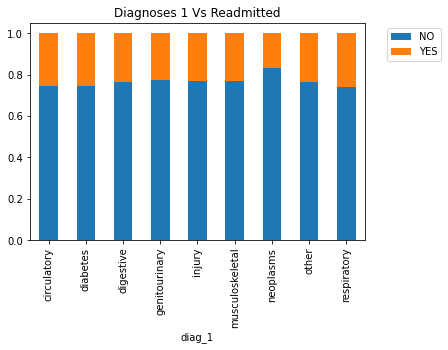

In [43]:
race = pd.crosstab(data_f.diag_1 , data_f.readmitted)#for creating contigenency table between 'diag_1' and 'readmitted' columns
race.div(race.sum(1).astype(float) , axis = 0).plot(kind = "bar", stacked = True )#for visualizing the proportion 'readmitted' categories for each 'diag_1'
plt.legend(bbox_to_anchor = (1.05 , 1))
plt.title("Diagnoses 1 Vs Readmitted")
plt.show()

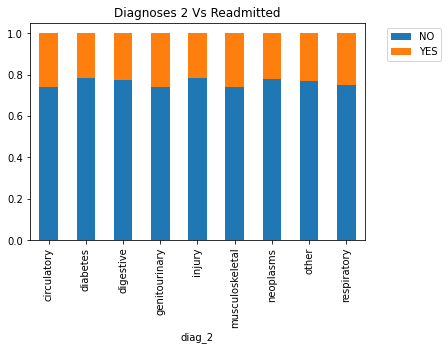

In [44]:
race = pd.crosstab(data_f.diag_2 , data_f.readmitted)
race.div(race.sum(1).astype(float) , axis = 0).plot(kind = "bar", stacked = True )
plt.legend(bbox_to_anchor = (1.05 , 1))
plt.title("Diagnoses 2 Vs Readmitted")
plt.show()

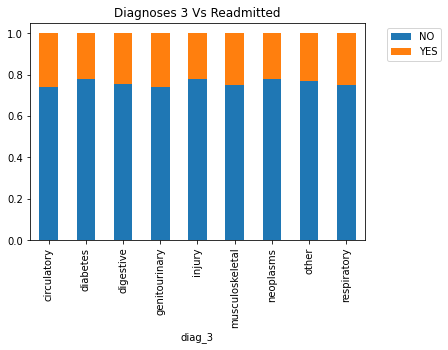

In [45]:
race = pd.crosstab(data_f.diag_3 , data_f.readmitted)
race.div(race.sum(1).astype(float) , axis = 0).plot(kind = "bar", stacked = True )
plt.legend(bbox_to_anchor = (1.05 , 1))
plt.title("Diagnoses 3 Vs Readmitted")
plt.show()

# Handling Outliers

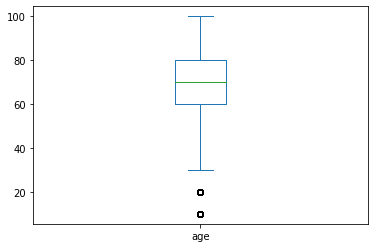

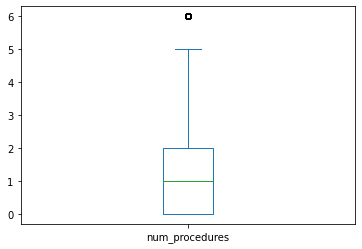

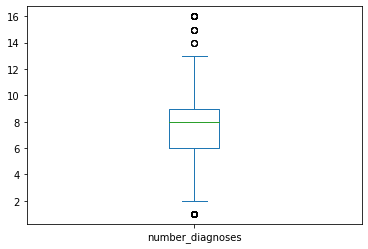

In [46]:
%matplotlib inline

columns = ["age", "num_procedures", "number_diagnoses"] #specifying columns for performing box plot

for column in columns:
    
    data_f[column].plot(kind = "box") #visualize box plot for current column
    plt.show()

In [47]:
# the outliers are replaced with the mode of remaining data (within boxplot range)
mode_age = data_f.loc[data_f['age'] > 30, 'age'].mode()[0]

data_f.loc[data_f['age'] < 30, 'age'] = mode_age

In [48]:
mode_proc = data_f.loc[data_f['num_procedures'] < 5, 'num_procedures'].mode()[0]

data_f.loc[data_f.num_procedures > 5, 'num_procedures'] = mode_proc

In [49]:
mode_diag = data_f.loc[data_f['number_diagnoses'] < 12, 'number_diagnoses'].mode()[0]

data_f.loc[data_f.number_diagnoses > 12, 'number_diagnoses'] = mode_diag

# VALUE DISTRIBUTION FOR FEATURES USING PIE CHART

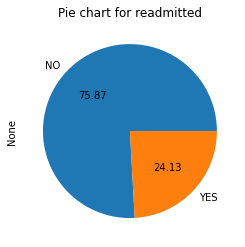

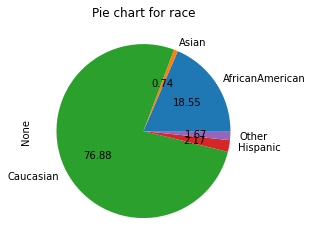

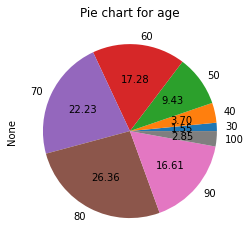

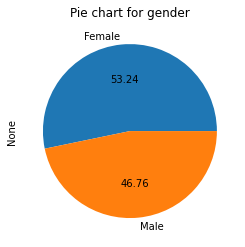

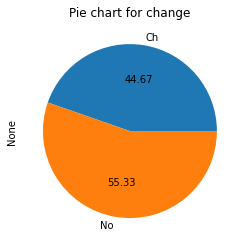

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

col=['readmitted','race','age','gender','change'] #separating columns to create pie charts for.

for i in col:
    data_f.groupby(i).size().plot(kind='pie', autopct='%.2f') # it will group the data by column and will calculate size of each group
    plt.title(f'Pie chart for {i}') #for setting title of plot
    plt.show()  #displaying plot

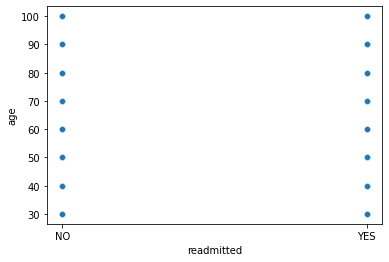

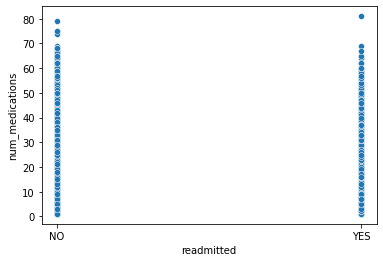

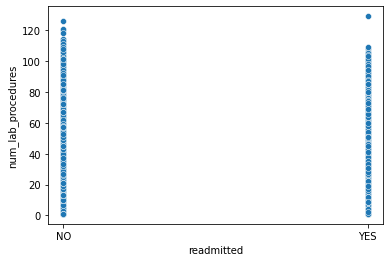

In [51]:
for column in ["age", "num_medications", "num_lab_procedures"]: #it will iterate through each loop
    sns.scatterplot(x = "readmitted", y = column, data = data_f) #for creating scatter plot where x axis represents "readmitted," and the y-axis represents the current column
    plt.show()

# Datatype Conversion

In [52]:
data_f.dtypes

race                        object
gender                      object
age                          int64
admission_type_id            int64
discharge_disposition_id     int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_emergency             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol            

In [53]:
# converting the datatype of columns to categorical for label encoding in future
for column in data_f.columns:
    if data_f[column].dtype == "object":
        data_f[column] = pd.Categorical(data_f[column])       

In [54]:
for col in data_f.columns:
    print(col,':', data_f[col].unique())

race : ['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic']
Categories (5, object): ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']
gender : ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
age : [ 80  30  40  50  60  70  90 100]
admission_type_id : [6 1 2 3 4 5 8 7]
discharge_disposition_id : [25  1  3  6  2  5 11 10  7 14  4 18  8 13 12 22 17 23  9 16 20 15 28 24
 19 27]
time_in_hospital : [ 1  3  2  4  5 13 12  9  7 10 11  6  8 14]
num_lab_procedures : [ 41  59  11  44  51  31  70  73  68  33  47  62  55  49  75  45  29  35
  42  19  64  52  87  53  46  28  36  48  72  10   2  65  67  58  37  57
  25  34  39  69  38  27  56  22  96  78  61  60  66  43   1  18  82  54
   9  24  71  63  77  50  81  93  76 103  80  90  16  32  12  30  17  21
  79  26  95  97  14  74  23  13  40 105  86  83  84  98  20   5  85   6
  94   8 102 100  15  88  91  92   4  89 101   3  99   7 114 111 129 107
 108 106 109 120 113 104 121 126 118]
num_procedures : [0 5 1 2 

In [55]:
data_f.dtypes

race                        category
gender                      category
age                            int64
admission_type_id              int64
discharge_disposition_id       int64
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_emergency               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
glipizide                   category
glyburide                   category
tolbutamide                 category
pioglitazone                category
rosiglitazone               category
a

# Handling Categorical Data

In [56]:
# converting strings to numbers using cat.codes
for column in data_f.columns:
    if pd.api.types.is_categorical_dtype(data_f[column]):
        data_f[column] = data_f[column].cat.codes

In [57]:
for column in data_f.columns:
    print("Unique values for ", column, " = ", data_f[column].unique())
    print()

Unique values for  race  =  [2 0 4 1 3]

Unique values for  gender  =  [0 1]

Unique values for  age  =  [ 80  30  40  50  60  70  90 100]

Unique values for  admission_type_id  =  [6 1 2 3 4 5 8 7]

Unique values for  discharge_disposition_id  =  [25  1  3  6  2  5 11 10  7 14  4 18  8 13 12 22 17 23  9 16 20 15 28 24
 19 27]

Unique values for  time_in_hospital  =  [ 1  3  2  4  5 13 12  9  7 10 11  6  8 14]

Unique values for  num_lab_procedures  =  [ 41  59  11  44  51  31  70  73  68  33  47  62  55  49  75  45  29  35
  42  19  64  52  87  53  46  28  36  48  72  10   2  65  67  58  37  57
  25  34  39  69  38  27  56  22  96  78  61  60  66  43   1  18  82  54
   9  24  71  63  77  50  81  93  76 103  80  90  16  32  12  30  17  21
  79  26  95  97  14  74  23  13  40 105  86  83  84  98  20   5  85   6
  94   8 102 100  15  88  91  92   4  89 101   3  99   7 114 111 129 107
 108 106 109 120 113 104 121 126 118]

Unique values for  num_procedures  =  [0 5 1 2 3 4]

Unique values

In [58]:
data_f.head()

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,...,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,80,6,25,1,41,0,1,0,...,1,0,0,1,1,0,0,1,0,0
1,2,0,80,1,1,3,59,0,18,0,...,1,0,0,3,1,0,0,0,1,1
2,0,0,30,1,1,2,11,5,13,0,...,1,0,0,1,1,0,0,1,1,0
3,2,1,40,1,1,2,44,1,16,0,...,1,0,0,3,1,0,0,0,1,0
4,2,1,50,1,1,1,51,0,8,0,...,1,0,0,2,1,0,0,0,1,0


# CORELATION OF FEATURES WITH TARGET

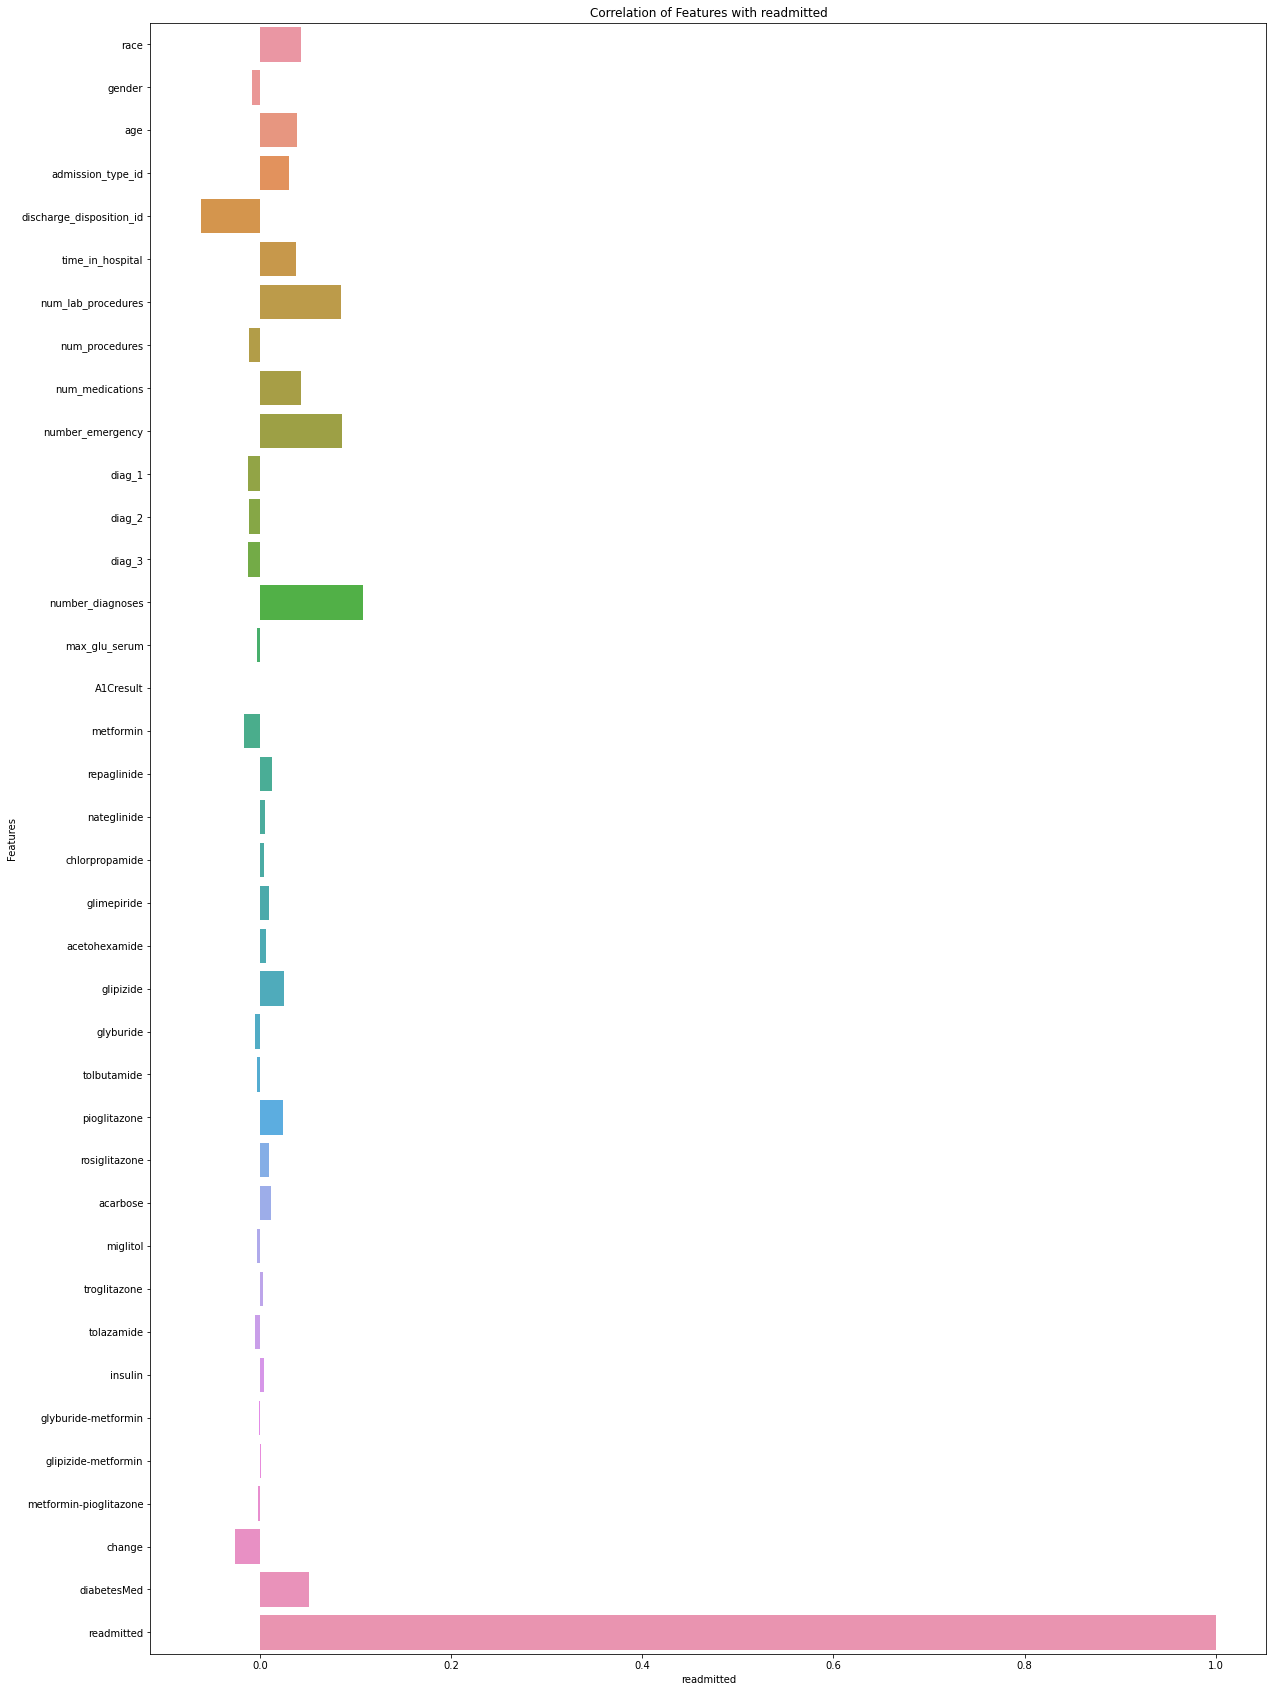

In [59]:
correlation_matrix = data_f.corr() #it will measure correlation between different features and target column

target_correlation = correlation_matrix['readmitted']

plt.figure(figsize=(20, 30)) 
#using seaborn for creating Horizontar bar plot for correlation value visualization
sns.barplot(y  = target_correlation.index, x = target_correlation.values, orient = 'h')

plt.xlabel('readmitted') #labelling for x-axis
plt.ylabel('Features')   #labelling for y-axis
plt.title('Correlation of Features with readmitted')

plt.show()

# SCATTER PLOT FOR AGE WITH OTHER FEATURES

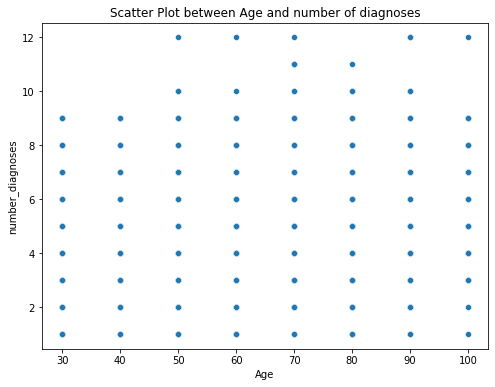

In [60]:
plt.figure(figsize=(8, 6))#defining size for the plot
sns.scatterplot(x='age', y='number_diagnoses', data=data_f)# creating scatter plot using seaborn to visualize the 'age' and 'number_diagnoses' features
plt.title("Scatter Plot between Age and number of diagnoses")
plt.xlabel("Age")
plt.ylabel("number_diagnoses")
plt.show()

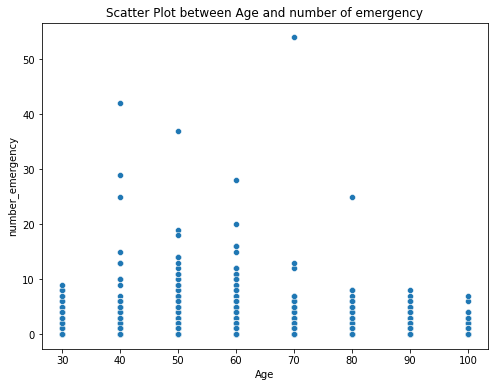

In [61]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='number_emergency', data=data_f)
plt.title("Scatter Plot between Age and number of emergency")
plt.xlabel("Age")
plt.ylabel("number_emergency")
plt.show()

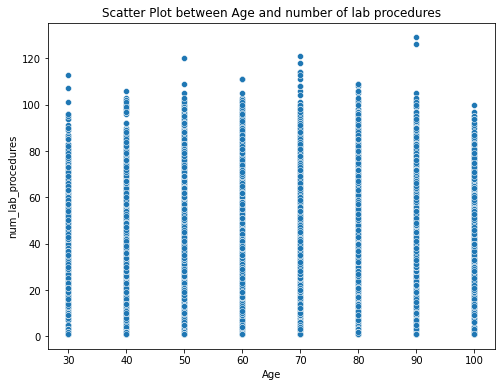

In [62]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='num_lab_procedures', data=data_f)
plt.title("Scatter Plot between Age and number of lab procedures")
plt.xlabel("Age")
plt.ylabel("num_lab_procedures")
plt.show()

# HISTOGRAM VISUALISATION 

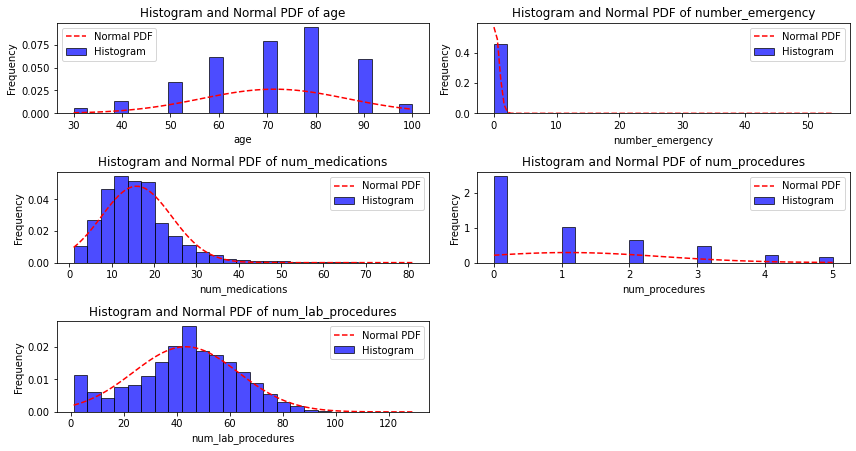

In [63]:
from scipy.stats import norm as nm
columns = ['age', 'number_emergency', 'num_medications', 'num_procedures', 'num_lab_procedures'] # extracting columns for which we want to plot histogram

plt.figure(figsize=(12, 8))

for i, column in enumerate(columns, 1):
    plt.subplot(4, 2, i)
    data = data_f[column]

    mu = data.mean() # performing mean and standard deviation to convert to normal distribution
    sigma = data.std()

    x = np.linspace(data.min(), data.max(), 100)
    pdf_values = nm.pdf(x, mu, sigma)

    plt.plot(x, pdf_values, '--', color='red', label='Normal PDF')
    plt.hist(data, bins=25, density=True, alpha=0.7, color='blue', label='Histogram',edgecolor='black')  # it will create a histogram plot for data using 25 bins and normalize it

    plt.title('Histogram and Normal PDF of ' + column) #setting title for histogram plot
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

# Feature Scaling

In [64]:
columns_to_be_scaled = ['age','discharge_disposition_id','time_in_hospital','num_lab_procedures','num_procedures',
                        'admission_type_id','num_medications','number_emergency','number_diagnoses'] 

In [65]:
# Scaling the values of the column using the min-max scaling formula
for col in columns_to_be_scaled:
    minimum = data_f[col].min() 
    maximum = data_f[col].max()
    data_f[col] = (data_f[col] - minimum) / (maximum - minimum)

In [66]:
data_f

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,...,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,0.714286,0.714286,0.888889,0.000000,0.312500,0.0,0.0000,0.0,...,1,0,0,1,1,0,0,1,0,0
1,2,0,0.714286,0.000000,0.000000,0.153846,0.453125,0.0,0.2125,0.0,...,1,0,0,3,1,0,0,0,1,1
2,0,0,0.000000,0.000000,0.000000,0.076923,0.078125,1.0,0.1500,0.0,...,1,0,0,1,1,0,0,1,1,0
3,2,1,0.142857,0.000000,0.000000,0.076923,0.335938,0.2,0.1875,0.0,...,1,0,0,3,1,0,0,0,1,0
4,2,1,0.285714,0.000000,0.000000,0.000000,0.390625,0.0,0.0875,0.0,...,1,0,0,2,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,0.714286,0.000000,0.074074,0.153846,0.390625,0.0,0.1875,0.0,...,1,0,0,0,1,0,0,0,1,1
101762,0,0,0.857143,0.000000,0.111111,0.307692,0.250000,0.6,0.2125,0.0,...,1,0,0,2,1,0,0,1,1,0
101763,2,1,0.714286,0.000000,0.000000,0.000000,0.406250,0.0,0.1000,0.0,...,1,0,0,0,1,0,0,0,1,0
101764,2,0,0.857143,0.142857,0.074074,0.692308,0.343750,0.4,0.2500,0.0,...,1,0,0,3,1,0,0,0,1,0


# CORELATION MATRIX

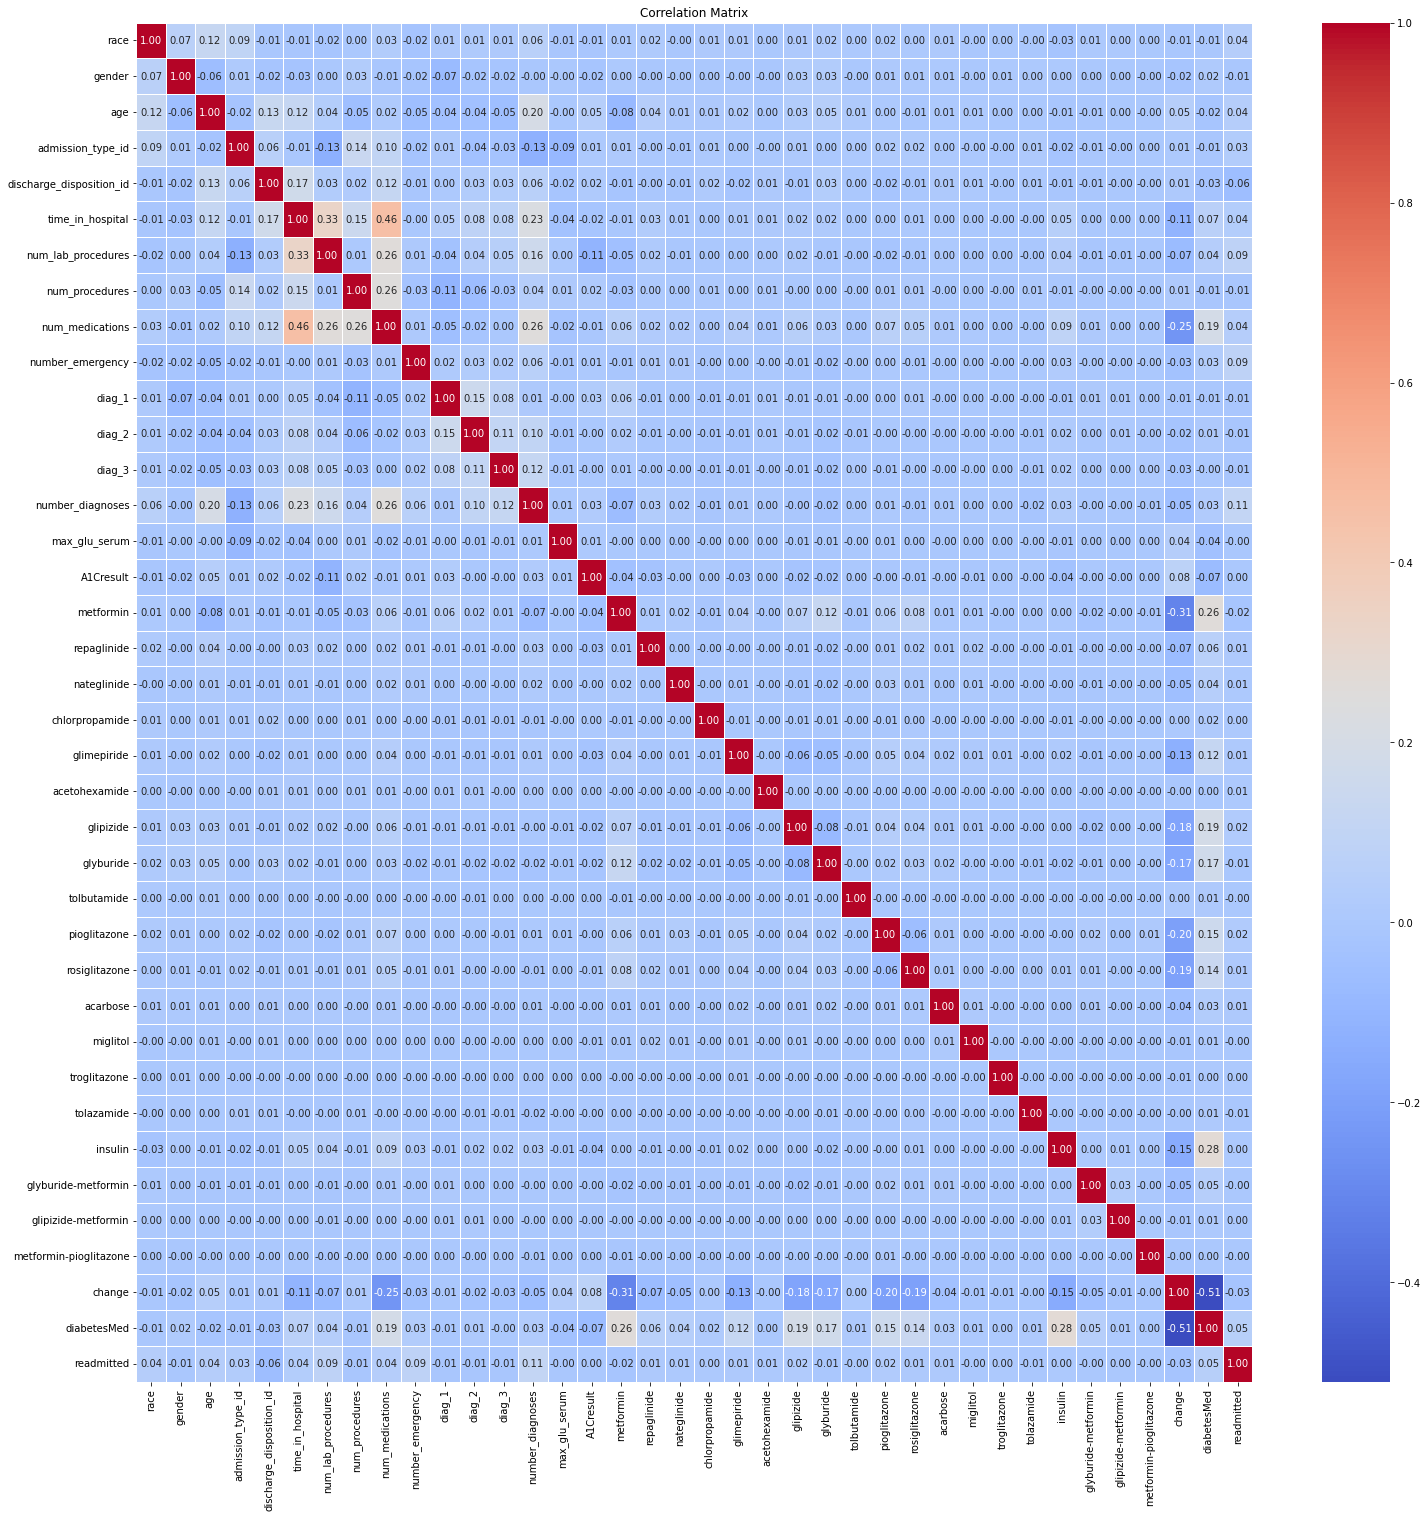

In [67]:
correlation_matrix = data_f.corr() #it will calculate sorrelation matrix for 'data_f'
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt=".2f") # it will create heatmap for correlation matrix value
plt.title('Correlation Matrix')
plt.show()

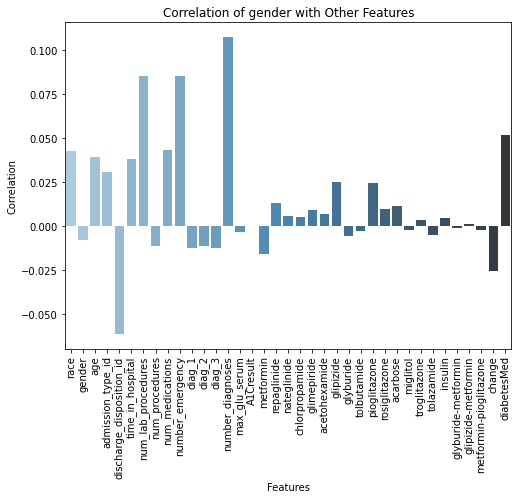

In [68]:
correlation_with_feature_a = correlation_matrix['readmitted'].drop('readmitted')
plt.figure(figsize=(8, 6)) # it will create a bar plot to visualize the correlations
sns.barplot(x=correlation_with_feature_a.index, y=correlation_with_feature_a.values, palette="Blues_d")#it will create barplot for visualizing using seaborn
plt.title("Correlation of gender with Other Features")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.show()

In [73]:
data_f['readmitted'].value_counts()

0    52837
1    16802
Name: readmitted, dtype: int64

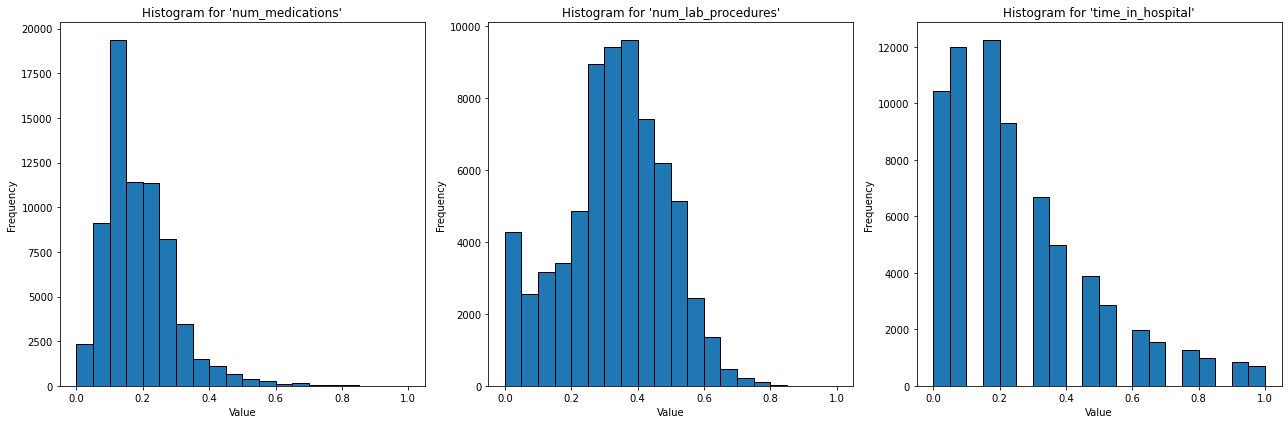

In [117]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

axes[0].hist(data_f['num_medications'], bins=20, edgecolor='k')
axes[0].set_title("Histogram for 'num_medications'")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

axes[1].hist(data_f['num_lab_procedures'], bins=20, edgecolor='k')
axes[1].set_title("Histogram for 'num_lab_procedures'")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")

axes[2].hist(data_f['time_in_hospital'], bins=20, edgecolor='k')
axes[2].set_title("Histogram for 'time_in_hospital'")
axes[2].set_xlabel("Value")
axes[2].set_ylabel("Frequency")

plt.tight_layout()

plt.show()

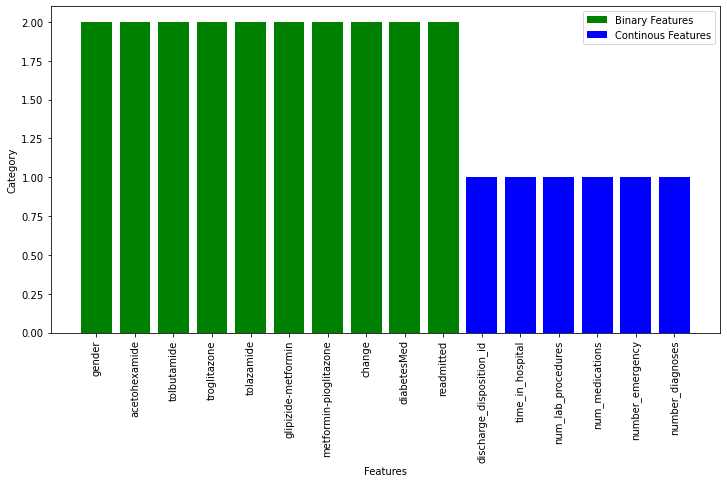

In [118]:
bf = []
nbf = []

for i in data_f.columns:
    uv = data_f[i].unique()
    nuv = len(uv)
    
    if nuv == 2:
        bf.append(i)
    elif nuv >= 10:
        nbf.append(i)

# Create a bar plot to visualize binary features
plt.figure(figsize=(12, 6))
plt.bar(bf, [2] * len(bf), color='green', label='Binary Features')

# Create a bar plot to visualize non-binary features
plt.bar(nbf, [1] * len(nbf), color='blue', label='Continous Features')

plt.xlabel('Features')
plt.ylabel('Category')
plt.legend()
plt.xticks(rotation=90)
plt.show()

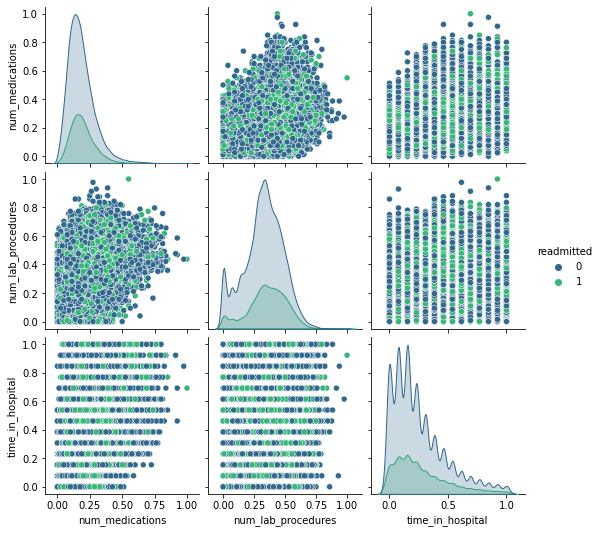

In [119]:
sns.pairplot(data_f, vars=['num_medications', 'num_lab_procedures', 'time_in_hospital'], hue='readmitted', palette='viridis')
plt.show()

# Train Test Split

In [79]:
X = data_f.drop('readmitted',axis='columns')
Y = data_f['readmitted']
X_train,X_test,Y_train,Y_test = tts(X, Y, test_size = 0.2, random_state=18)

# NAIVE BAYES

In [80]:
Naive_model = GNB()
Naive_model.fit(X_train,Y_train)

Y_pred = Naive_model.predict(X_test)
print("Accuracy : ", acc(Y_test,Y_pred)*100)
print("Precision : ", precision_score(Y_test, Y_pred))
print("Recall : ", recall_score(Y_test, Y_pred))
print("F1-score : ", f1_score(Y_test, Y_pred))

Accuracy :  70.67059161401494
Precision :  0.34469535577332766
Recall :  0.24106078665077474
F1-score :  0.28371032789759776


In [81]:
Naive_model = BNB()
Naive_model.fit(X_train,Y_train)

Y_pred = Naive_model.predict(X_test)
print("Accuracy : ", acc(Y_test,Y_pred)*100)
print("Precision : ", precision_score(Y_test, Y_pred))
print("Recall : ", recall_score(Y_test, Y_pred))
print("F1-score : ", f1_score(Y_test, Y_pred))

Accuracy :  75.91183228029867
Precision :  0.5263157894736842
Recall :  0.0029797377830750892
F1-score :  0.005925925925925926


In [82]:
import optuna
def objective(trial):
    
    alpha = trial.suggest_float('alpha', 0.001, 10)
    binarize = trial.suggest_float('binarize', 0.0, 1.0)
    
    model = BNB(alpha=alpha, binarize=binarize)
    model.fit(X_train, Y_train)
    
    Y_pred = model.predict(X_test)

    accuracy = acc(Y_test, Y_pred)
    
    return accuracy

study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 1000)

print(study.best_params)

print("Accuracy Score: " ,study.best_trial.value * 100)

[I 2023-11-11 13:23:09,899] A new study created in memory with name: no-name-29aa9669-1072-478a-baaa-1f52df08d055
[I 2023-11-11 13:23:10,009] Trial 0 finished with value: 0.7591901206203331 and parameters: {'alpha': 2.031457847294277, 'binarize': 0.35547046911328506}. Best is trial 0 with value: 0.7591901206203331.
[I 2023-11-11 13:23:10,132] Trial 1 finished with value: 0.7580413555427915 and parameters: {'alpha': 0.5761402624792005, 'binarize': 0.6920104497867817}. Best is trial 0 with value: 0.7591901206203331.
[I 2023-11-11 13:23:10,266] Trial 2 finished with value: 0.7586875358989087 and parameters: {'alpha': 3.018296433352063, 'binarize': 0.7828093775358352}. Best is trial 0 with value: 0.7591901206203331.
[I 2023-11-11 13:23:10,402] Trial 3 finished with value: 0.7597645031591039 and parameters: {'alpha': 4.022499042059585, 'binarize': 0.055559042246766555}. Best is trial 3 with value: 0.7597645031591039.
[I 2023-11-11 13:23:10,492] Trial 4 finished with value: 0.758759333716255

[I 2023-11-11 13:23:14,046] Trial 40 finished with value: 0.7595491097070649 and parameters: {'alpha': 2.7140088442675374, 'binarize': 0.055124484761061215}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:14,135] Trial 41 finished with value: 0.7597645031591039 and parameters: {'alpha': 4.154032799629506, 'binarize': 0.060945270884525365}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:14,236] Trial 42 finished with value: 0.7595491097070649 and parameters: {'alpha': 3.280835254756907, 'binarize': 0.0973736195047148}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:14,329] Trial 43 finished with value: 0.7584003446295232 and parameters: {'alpha': 5.290061640485967, 'binarize': 0.03420884378268279}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:14,431] Trial 44 finished with value: 0.7591183228029867 and parameters: {'alpha': 4.23494686628939, 'binarize': 0.17734823772582095}. Best is trial 11 with v

[I 2023-11-11 13:23:18,310] Trial 80 finished with value: 0.7596209075244112 and parameters: {'alpha': 2.748782866628952, 'binarize': 0.053755052818067736}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:18,492] Trial 81 finished with value: 0.7600516944284894 and parameters: {'alpha': 3.3365781754946147, 'binarize': 0.08268274592123283}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:18,687] Trial 82 finished with value: 0.7594055140723722 and parameters: {'alpha': 2.955225425532877, 'binarize': 0.1155790516616028}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:18,915] Trial 83 finished with value: 0.7597645031591039 and parameters: {'alpha': 2.2607488276991443, 'binarize': 0.059907662634833894}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:19,077] Trial 84 finished with value: 0.7590465249856404 and parameters: {'alpha': 4.006204727148993, 'binarize': 0.14080809349265702}. Best is trial 11 with

[I 2023-11-11 13:23:22,934] Trial 120 finished with value: 0.7591183228029867 and parameters: {'alpha': 4.386717823956263, 'binarize': 0.1333472815888576}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:23,027] Trial 121 finished with value: 0.7600516944284894 and parameters: {'alpha': 2.4722631792165086, 'binarize': 0.08683077154361094}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:23,129] Trial 122 finished with value: 0.7595491097070649 and parameters: {'alpha': 3.1345098898610977, 'binarize': 0.10739927300461054}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:23,230] Trial 123 finished with value: 0.7597645031591039 and parameters: {'alpha': 2.4712177413372722, 'binarize': 0.059953269502359845}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:23,331] Trial 124 finished with value: 0.7601234922458358 and parameters: {'alpha': 2.7955138463975646, 'binarize': 0.08831242293924671}. Best is trial 1

[I 2023-11-11 13:23:27,337] Trial 160 finished with value: 0.7597645031591039 and parameters: {'alpha': 3.8521857789735074, 'binarize': 0.07339227823472128}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:27,427] Trial 161 finished with value: 0.7596209075244112 and parameters: {'alpha': 2.3655262379803985, 'binarize': 0.09270973112663553}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:27,536] Trial 162 finished with value: 0.7594055140723722 and parameters: {'alpha': 2.5209989411457863, 'binarize': 0.11265040427266135}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:27,648] Trial 163 finished with value: 0.7600516944284894 and parameters: {'alpha': 2.0239211943768383, 'binarize': 0.08293710757137256}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:27,729] Trial 164 finished with value: 0.7597645031591039 and parameters: {'alpha': 2.7357481294734116, 'binarize': 0.056440127341465224}. Best is trial

[I 2023-11-11 13:23:30,902] Trial 200 finished with value: 0.7598363009764503 and parameters: {'alpha': 2.735375630493168, 'binarize': 0.06679326793393643}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:30,994] Trial 201 finished with value: 0.7600516944284894 and parameters: {'alpha': 2.519633053149797, 'binarize': 0.08293949825609935}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:31,084] Trial 202 finished with value: 0.7595491097070649 and parameters: {'alpha': 3.042921341404676, 'binarize': 0.047057652015772486}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:31,181] Trial 203 finished with value: 0.7600516944284894 and parameters: {'alpha': 2.67965473660259, 'binarize': 0.08271117684652356}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:31,275] Trial 204 finished with value: 0.7594055140723722 and parameters: {'alpha': 2.235887633326541, 'binarize': 0.11239847666120256}. Best is trial 11 wi

[I 2023-11-11 13:23:34,350] Trial 240 finished with value: 0.7591901206203331 and parameters: {'alpha': 3.5620455174419856, 'binarize': 0.13014417883111426}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:34,434] Trial 241 finished with value: 0.7600516944284894 and parameters: {'alpha': 2.355063008077711, 'binarize': 0.08556271047713065}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:34,517] Trial 242 finished with value: 0.7589747271682941 and parameters: {'alpha': 2.5263782888811663, 'binarize': 0.22527092398736492}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:34,598] Trial 243 finished with value: 0.7595491097070649 and parameters: {'alpha': 2.8955030778528243, 'binarize': 0.10870419224144875}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:34,680] Trial 244 finished with value: 0.7598363009764503 and parameters: {'alpha': 2.416125066548524, 'binarize': 0.06797523936632216}. Best is trial 11

[I 2023-11-11 13:23:37,757] Trial 280 finished with value: 0.7591901206203331 and parameters: {'alpha': 1.9384576636949953, 'binarize': 0.462181656779036}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:37,839] Trial 281 finished with value: 0.7595491097070649 and parameters: {'alpha': 2.6759856071901322, 'binarize': 0.10988949390546998}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:37,920] Trial 282 finished with value: 0.7590465249856404 and parameters: {'alpha': 1.7137629903861558, 'binarize': 0.18023951253514578}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:38,003] Trial 283 finished with value: 0.7594773118897186 and parameters: {'alpha': 2.152690962236816, 'binarize': 0.04146496609320269}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:38,086] Trial 284 finished with value: 0.7597645031591039 and parameters: {'alpha': 2.4909847979738386, 'binarize': 0.061226509623167814}. Best is trial 11

[I 2023-11-11 13:23:41,279] Trial 320 finished with value: 0.7584721424468697 and parameters: {'alpha': 3.2347388319245267, 'binarize': 0.028246089454659076}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:41,407] Trial 321 finished with value: 0.7593337162550259 and parameters: {'alpha': 2.326712444856484, 'binarize': 0.4204582654578888}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:41,505] Trial 322 finished with value: 0.7595491097070649 and parameters: {'alpha': 2.106580564725889, 'binarize': 0.49696659696205153}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:41,613] Trial 323 finished with value: 0.7597645031591039 and parameters: {'alpha': 2.5768886794225274, 'binarize': 0.05809762938447942}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:41,713] Trial 324 finished with value: 0.7592619184376795 and parameters: {'alpha': 2.9054236709480294, 'binarize': 0.13682201881291736}. Best is trial 11

[I 2023-11-11 13:23:45,087] Trial 360 finished with value: 0.7593337162550259 and parameters: {'alpha': 3.338101235802116, 'binarize': 0.4781911898753073}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:45,185] Trial 361 finished with value: 0.7601952900631821 and parameters: {'alpha': 2.3141150166148194, 'binarize': 0.07539704441111755}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:45,281] Trial 362 finished with value: 0.7595491097070649 and parameters: {'alpha': 2.050314392121731, 'binarize': 0.03820063081907944}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:45,377] Trial 363 finished with value: 0.7598363009764503 and parameters: {'alpha': 2.31758700143073, 'binarize': 0.07183235422906721}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:45,476] Trial 364 finished with value: 0.7596209075244112 and parameters: {'alpha': 2.3231855409077333, 'binarize': 0.05315323890874295}. Best is trial 11 wi

[I 2023-11-11 13:23:49,074] Trial 400 finished with value: 0.7597645031591039 and parameters: {'alpha': 2.8302324713039764, 'binarize': 0.06045267306999864}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:49,172] Trial 401 finished with value: 0.7595491097070649 and parameters: {'alpha': 3.134871732443181, 'binarize': 0.10931651494835101}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:49,271] Trial 402 finished with value: 0.7600516944284894 and parameters: {'alpha': 1.7448893209953809, 'binarize': 0.08441832392927463}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:49,372] Trial 403 finished with value: 0.7588311315336014 and parameters: {'alpha': 2.5096351664748333, 'binarize': 0.268563451022062}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:49,471] Trial 404 finished with value: 0.7584003446295232 and parameters: {'alpha': 4.265967165513672, 'binarize': 0.029977974435575233}. Best is trial 11 

[I 2023-11-11 13:23:53,172] Trial 440 finished with value: 0.7594055140723722 and parameters: {'alpha': 2.4434568046240748, 'binarize': 0.11731414557331668}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:53,272] Trial 441 finished with value: 0.7584721424468697 and parameters: {'alpha': 2.0858017581803776, 'binarize': 0.026657738164640732}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:53,372] Trial 442 finished with value: 0.7598363009764503 and parameters: {'alpha': 1.216585400082188, 'binarize': 0.06999237161213097}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:53,484] Trial 443 finished with value: 0.7589029293509477 and parameters: {'alpha': 5.412555936673805, 'binarize': 0.2089767100871578}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:53,588] Trial 444 finished with value: 0.7586875358989087 and parameters: {'alpha': 3.5713251785636566, 'binarize': 0.8151557876149905}. Best is trial 11 

[I 2023-11-11 13:23:57,342] Trial 480 finished with value: 0.7594055140723722 and parameters: {'alpha': 2.355520415100825, 'binarize': 0.11217220373590683}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:57,447] Trial 481 finished with value: 0.7591901206203331 and parameters: {'alpha': 2.626473089063436, 'binarize': 0.01821200084278414}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:57,555] Trial 482 finished with value: 0.7592619184376795 and parameters: {'alpha': 4.203399242251116, 'binarize': 0.3613437372800366}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:57,664] Trial 483 finished with value: 0.7589747271682941 and parameters: {'alpha': 2.003303081477013, 'binarize': 0.33275948018141577}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:23:57,764] Trial 484 finished with value: 0.7590465249856404 and parameters: {'alpha': 8.732698081181022, 'binarize': 0.16454870436055877}. Best is trial 11 wit

[I 2023-11-11 13:24:01,636] Trial 520 finished with value: 0.7598363009764503 and parameters: {'alpha': 1.8183038495500694, 'binarize': 0.07112232445220772}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:24:01,740] Trial 521 finished with value: 0.7589029293509477 and parameters: {'alpha': 2.1993870204998736, 'binarize': 0.28263662391307054}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:24:01,848] Trial 522 finished with value: 0.7588311315336014 and parameters: {'alpha': 1.5285931994429034, 'binarize': 0.8375827917154028}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:24:01,953] Trial 523 finished with value: 0.7595491097070649 and parameters: {'alpha': 2.0913437542651323, 'binarize': 0.04695060984623324}. Best is trial 11 with value: 0.7601952900631821.
[I 2023-11-11 13:24:02,058] Trial 524 finished with value: 0.7594055140723722 and parameters: {'alpha': 2.3495652931778306, 'binarize': 0.4846869252479339}. Best is trial 11

[I 2023-11-11 13:24:05,975] Trial 560 finished with value: 0.7603388856978748 and parameters: {'alpha': 4.395903601554448, 'binarize': 0.07431604683855784}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:06,082] Trial 561 finished with value: 0.7584003446295232 and parameters: {'alpha': 4.725442606161077, 'binarize': 0.029795625018314745}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:06,188] Trial 562 finished with value: 0.7597645031591039 and parameters: {'alpha': 4.409492041214897, 'binarize': 0.07341906434432327}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:06,289] Trial 563 finished with value: 0.758759333716255 and parameters: {'alpha': 4.002602720008357, 'binarize': 0.7476253596252829}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:06,463] Trial 564 finished with value: 0.7596927053417576 and parameters: {'alpha': 4.490641223327261, 'binarize': 0.05565796726020623}. Best is trial 56

[I 2023-11-11 13:24:10,447] Trial 600 finished with value: 0.7588311315336014 and parameters: {'alpha': 1.8420527587409892, 'binarize': 0.7412496788749282}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:10,545] Trial 601 finished with value: 0.7597645031591039 and parameters: {'alpha': 3.2471336500569183, 'binarize': 0.06240736765009214}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:10,645] Trial 602 finished with value: 0.7592619184376795 and parameters: {'alpha': 5.244184373165648, 'binarize': 0.11342303754394581}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:10,744] Trial 603 finished with value: 0.7589747271682941 and parameters: {'alpha': 2.2955295908176447, 'binarize': 0.3253463602900922}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:10,843] Trial 604 finished with value: 0.7590465249856404 and parameters: {'alpha': 2.492285149558353, 'binarize': 0.31006465695691515}. Best is trial 

[I 2023-11-11 13:24:14,508] Trial 640 finished with value: 0.7588311315336014 and parameters: {'alpha': 0.07818559326621344, 'binarize': 0.731105087406198}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:14,608] Trial 641 finished with value: 0.7589747271682941 and parameters: {'alpha': 3.4429035315753214, 'binarize': 0.26522566379298784}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:14,706] Trial 642 finished with value: 0.7598363009764503 and parameters: {'alpha': 2.698281958982175, 'binarize': 0.06370341058018408}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:14,815] Trial 643 finished with value: 0.7596209075244112 and parameters: {'alpha': 2.003056116389891, 'binarize': 0.09300962371235853}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:14,914] Trial 644 finished with value: 0.7592619184376795 and parameters: {'alpha': 8.68568135796318, 'binarize': 0.4717997396169259}. Best is trial 56

[I 2023-11-11 13:24:18,613] Trial 680 finished with value: 0.7595491097070649 and parameters: {'alpha': 2.5368984708982625, 'binarize': 0.36961620011698204}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:18,709] Trial 681 finished with value: 0.7586875358989087 and parameters: {'alpha': 3.41081005253214, 'binarize': 0.8055479324866086}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:18,812] Trial 682 finished with value: 0.7595491097070649 and parameters: {'alpha': 8.3218065274008, 'binarize': 0.07026949535835444}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:18,915] Trial 683 finished with value: 0.7592619184376795 and parameters: {'alpha': 5.7038371968235175, 'binarize': 0.12140615937674351}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:19,013] Trial 684 finished with value: 0.7589029293509477 and parameters: {'alpha': 2.2850577146969178, 'binarize': 0.9794754272552146}. Best is trial 560

[I 2023-11-11 13:24:22,795] Trial 720 finished with value: 0.7594773118897186 and parameters: {'alpha': 2.7112708394366303, 'binarize': 0.04351525474953739}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:22,902] Trial 721 finished with value: 0.7591901206203331 and parameters: {'alpha': 3.5314701867072684, 'binarize': 0.13010212585736763}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:23,006] Trial 722 finished with value: 0.7601952900631821 and parameters: {'alpha': 2.290246531868566, 'binarize': 0.07531103463739526}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:23,108] Trial 723 finished with value: 0.7584003446295232 and parameters: {'alpha': 4.903818366498615, 'binarize': 0.028621595294523884}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:23,211] Trial 724 finished with value: 0.7597645031591039 and parameters: {'alpha': 2.8575956399530074, 'binarize': 0.058123770023428535}. Best is tr

[I 2023-11-11 13:24:26,978] Trial 760 finished with value: 0.7588311315336014 and parameters: {'alpha': 2.8353648732832877, 'binarize': 0.956148699789576}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:27,083] Trial 761 finished with value: 0.758759333716255 and parameters: {'alpha': 9.344635597438955, 'binarize': 0.24719855546815783}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:27,187] Trial 762 finished with value: 0.7591183228029867 and parameters: {'alpha': 4.476335724168182, 'binarize': 0.002952374607509717}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:27,292] Trial 763 finished with value: 0.7598363009764503 and parameters: {'alpha': 2.609561658462768, 'binarize': 0.07113057257627292}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:27,397] Trial 764 finished with value: 0.7594055140723722 and parameters: {'alpha': 2.0910969265489503, 'binarize': 0.12550562961768655}. Best is trial 5

[I 2023-11-11 13:24:31,270] Trial 800 finished with value: 0.7596927053417576 and parameters: {'alpha': 4.331949944826549, 'binarize': 0.06138969530586576}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:31,375] Trial 801 finished with value: 0.7596209075244112 and parameters: {'alpha': 2.8512262040314855, 'binarize': 0.09351615300729493}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:31,483] Trial 802 finished with value: 0.7592619184376795 and parameters: {'alpha': 8.429987044315862, 'binarize': 0.11845870066625691}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:31,588] Trial 803 finished with value: 0.7600516944284894 and parameters: {'alpha': 1.5672026896893039, 'binarize': 0.07749690286049678}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:31,692] Trial 804 finished with value: 0.7591183228029867 and parameters: {'alpha': 2.4271750850926472, 'binarize': 0.3507000732940722}. Best is trial

[I 2023-11-11 13:24:35,620] Trial 840 finished with value: 0.7583285468121769 and parameters: {'alpha': 6.722320509327783, 'binarize': 0.02285341407226573}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:35,727] Trial 841 finished with value: 0.7590465249856404 and parameters: {'alpha': 8.164030900570221, 'binarize': 0.1476935182057079}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:35,833] Trial 842 finished with value: 0.7589747271682941 and parameters: {'alpha': 5.387265877553622, 'binarize': 0.9961177530715726}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:35,941] Trial 843 finished with value: 0.7600516944284894 and parameters: {'alpha': 4.3734406468213525, 'binarize': 0.08862458555827686}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:36,045] Trial 844 finished with value: 0.7596927053417576 and parameters: {'alpha': 6.76402133167356, 'binarize': 0.055658258219635826}. Best is trial 56

[I 2023-11-11 13:24:40,043] Trial 880 finished with value: 0.7595491097070649 and parameters: {'alpha': 5.210142789113116, 'binarize': 0.10714541541544613}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:40,151] Trial 881 finished with value: 0.7588311315336014 and parameters: {'alpha': 7.159182763310593, 'binarize': 0.230107233468014}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:40,259] Trial 882 finished with value: 0.7598363009764503 and parameters: {'alpha': 0.9964633337761062, 'binarize': 0.07097046153389615}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:40,369] Trial 883 finished with value: 0.7589747271682941 and parameters: {'alpha': 3.568441709058981, 'binarize': 0.27754183369011387}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:40,479] Trial 884 finished with value: 0.7590465249856404 and parameters: {'alpha': 2.016045127908515, 'binarize': 0.18294087902374379}. Best is trial 56

[I 2023-11-11 13:24:44,584] Trial 920 finished with value: 0.7594055140723722 and parameters: {'alpha': 1.9085228095828712, 'binarize': 0.12179378286862677}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:44,705] Trial 921 finished with value: 0.7600516944284894 and parameters: {'alpha': 4.110117209880956, 'binarize': 0.09035999641642288}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:44,806] Trial 922 finished with value: 0.7596209075244112 and parameters: {'alpha': 8.44849127723038, 'binarize': 0.05672440514216026}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:44,916] Trial 923 finished with value: 0.7600516944284894 and parameters: {'alpha': 3.4766982156688444, 'binarize': 0.07790657679612568}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:45,028] Trial 924 finished with value: 0.7595491097070649 and parameters: {'alpha': 2.3021046252545467, 'binarize': 0.10630679214688488}. Best is trial

[I 2023-11-11 13:24:49,081] Trial 960 finished with value: 0.7591183228029867 and parameters: {'alpha': 2.1656655135357523, 'binarize': 0.0006423652947792069}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:49,189] Trial 961 finished with value: 0.7597645031591039 and parameters: {'alpha': 2.007641223888764, 'binarize': 0.05842472021192112}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:49,300] Trial 962 finished with value: 0.7588311315336014 and parameters: {'alpha': 8.671505121616537, 'binarize': 0.4585259445588472}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:49,421] Trial 963 finished with value: 0.7594773118897186 and parameters: {'alpha': 6.659603091370085, 'binarize': 0.10627944361417846}. Best is trial 560 with value: 0.7603388856978748.
[I 2023-11-11 13:24:49,532] Trial 964 finished with value: 0.7590465249856404 and parameters: {'alpha': 2.935385227173701, 'binarize': 0.14214948615791428}. Best is trial

{'alpha': 4.395903601554448, 'binarize': 0.07431604683855784}
Accuracy Score:  76.03388856978748


In [83]:
Naive_model = BNB(alpha= 0.9531415419736797, binarize= 0.07679306140601003)
Naive_model.fit(X_train,Y_train)

Y_pred = Naive_model.predict(X_test)
print("Accuracy : ", acc(Y_test,Y_pred)*100)
print("Precision : ", precision_score(Y_test, Y_pred))
print("Recall : ", recall_score(Y_test, Y_pred))
print("F1-score : ", f1_score(Y_test, Y_pred))

Accuracy :  76.01952900631821
Precision :  0.7
Recall :  0.00834326579261025
F1-score :  0.016489988221436984


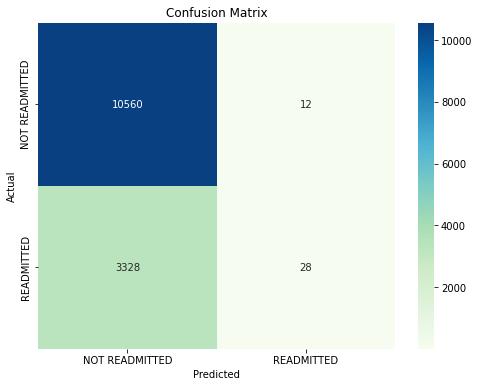

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

con_mat = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt="d", cmap="GnBu", xticklabels=["NOT READMITTED", "READMITTED"], yticklabels=["NOT READMITTED", "READMITTED"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

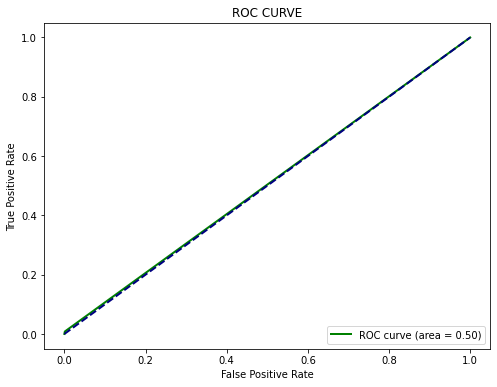

In [85]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# KNN

In [86]:
KNN_model = KNC(n_neighbors=8)
KNN_model.fit(X_train, Y_train)

Y_pred1 = KNN_model.predict(X_test)
print("Accuracy : ", acc(Y_test,Y_pred1)*100)
print("Precision : ", precision_score(Y_test, Y_pred1))
print("Recall : ", recall_score(Y_test, Y_pred1))
print("F1-score : ", f1_score(Y_test, Y_pred1))

Accuracy :  74.69126938541069
Precision :  0.31982942430703626
Recall :  0.04469606674612634
F1-score :  0.0784313725490196


In [87]:
def objective(trial):
    
    n_neighbors = trial.suggest_int('n_neighbors', 2, 20)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    p = trial.suggest_int('p', 1, 2)
    
    model = KNC(n_neighbors=n_neighbors, weights=weights, p=p)
    model.fit(X_train, Y_train)
    
    Y_pred = model.predict(X_test)

    accuracy = acc(Y_test, Y_pred)
    
    return accuracy

study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 25)

print(study.best_params)

print("Accuracy Score: " ,study.best_trial.value * 100)

[I 2023-11-11 13:24:58,216] A new study created in memory with name: no-name-31b5b969-c603-4cc9-9975-98a94f29a260
[I 2023-11-11 13:25:23,359] Trial 0 finished with value: 0.7528719126938541 and parameters: {'n_neighbors': 19, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.7528719126938541.
[I 2023-11-11 13:25:27,295] Trial 1 finished with value: 0.7502871912693854 and parameters: {'n_neighbors': 17, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.7528719126938541.
[I 2023-11-11 13:25:30,866] Trial 2 finished with value: 0.7401636990235497 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.7528719126938541.
[I 2023-11-11 13:25:54,754] Trial 3 finished with value: 0.7308299827685238 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.7528719126938541.
[I 2023-11-11 13:26:18,862] Trial 4 finished with value: 0.735137851809305 and parameters: {'n_neighbors': 9, 'weights': '

{'n_neighbors': 20, 'weights': 'uniform', 'p': 1}
Accuracy Score:  75.60310166570936


In [88]:
KNN_model = KNC(n_neighbors=20, weights='uniform', p=1)
KNN_model.fit(X_train, Y_train)

Y_pred1 = KNN_model.predict(X_test)
print("Accuracy : ", acc(Y_test,Y_pred1)*100)
print("Precision : ", precision_score(Y_test, Y_pred1))
print("Recall : ", recall_score(Y_test, Y_pred1))
print("F1-score : ", f1_score(Y_test, Y_pred1))

Accuracy :  75.60310166570936
Precision :  0.3220338983050847
Recall :  0.01132300357568534
F1-score :  0.021876799078871616


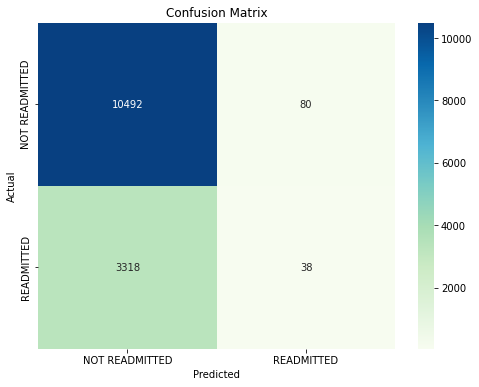

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

con_mat = confusion_matrix(Y_test, Y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt="d", cmap="GnBu", xticklabels=["NOT READMITTED", "READMITTED"], yticklabels=["NOT READMITTED", "READMITTED"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

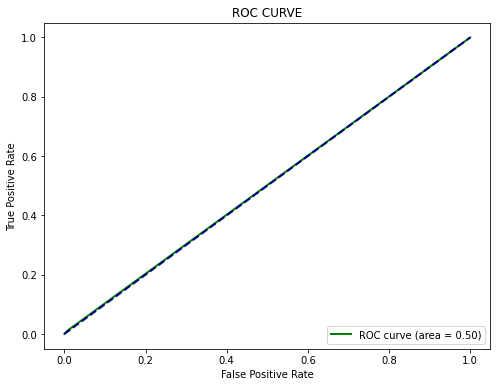

In [90]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# LOGISTIC REGRESSION

In [92]:
lr_model = LogisticRegression(max_iter=100000, C=1.0, solver='sag' )
lr_model.fit(X_train,Y_train)
lr_model_pred = lr_model.predict(X_test)
lr_model_acc=acc(Y_test,lr_model_pred)


print("Accuracy of model (using Logistic Regression): ",lr_model_acc)
print("Precision : ", precision_score(Y_test, lr_model_pred))
print("Recall : ", recall_score(Y_test, lr_model_pred))
print("F1-score : ", f1_score(Y_test, lr_model_pred))

Accuracy of model (using Logistic Regression):  0.7599080987937966
Precision :  0.6578947368421053
Recall :  0.007449344457687724
F1-score :  0.01473187978786093


In [96]:
def objective(trial):
    c_val = trial.suggest_loguniform('C', 0.01, 10)
    max_iter_val = trial.suggest_int('max_iter', 100, 100000)
    solver_val = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'sag', 'newton-cg'])
    sample = LogisticRegression(C=c_val, max_iter=max_iter_val, solver=solver_val, random_state=42)
    sample.fit(X_train, Y_train)
    sample_prediction = sample.predict(X_test)
    accuracy = acc(Y_test, sample_prediction)
    return accuracy



study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print(study.best_params)

print("Accuracy Score: " ,study.best_trial.value * 100)

[I 2023-11-11 13:38:30,374] A new study created in memory with name: no-name-97ed30ba-e3dd-421d-959c-583b3a4f0cae
<ipython-input-96-722d3deee23d>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_val = trial.suggest_loguniform('C', 0.01, 10)
[I 2023-11-11 13:38:32,878] Trial 0 finished with value: 0.758759333716255 and parameters: {'C': 0.06721293866263792, 'max_iter': 40898, 'solver': 'newton-cg'}. Best is trial 0 with value: 0.758759333716255.
<ipython-input-96-722d3deee23d>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_val = trial.suggest_loguniform('C', 0.01, 10)
[I 2023-11-11 13:38:38,927] Trial 1 finished with value: 0.7591183228029867 and parameters: {'C': 

[I 2023-11-11 13:39:29,428] Trial 16 finished with value: 0.7588311315336014 and parameters: {'C': 0.15568686436837778, 'max_iter': 37278, 'solver': 'liblinear'}. Best is trial 13 with value: 0.7611286616886846.
<ipython-input-96-722d3deee23d>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_val = trial.suggest_loguniform('C', 0.01, 10)
[I 2023-11-11 13:39:32,363] Trial 17 finished with value: 0.7611286616886846 and parameters: {'C': 3.3602563807663772, 'max_iter': 15898, 'solver': 'liblinear'}. Best is trial 13 with value: 0.7611286616886846.
<ipython-input-96-722d3deee23d>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_val = trial.suggest_loguniform('C', 0.01, 1

<ipython-input-96-722d3deee23d>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_val = trial.suggest_loguniform('C', 0.01, 10)
[I 2023-11-11 13:40:25,472] Trial 33 finished with value: 0.760985066053992 and parameters: {'C': 5.638201313957322, 'max_iter': 38046, 'solver': 'liblinear'}. Best is trial 13 with value: 0.7611286616886846.
<ipython-input-96-722d3deee23d>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_val = trial.suggest_loguniform('C', 0.01, 10)
[I 2023-11-11 13:40:28,402] Trial 34 finished with value: 0.7600516944284894 and parameters: {'C': 1.4397519440126716, 'max_iter': 20528, 'solver': 'liblinear'}. Best is trial 13 with value: 0.7611286616886846.


[I 2023-11-11 13:41:32,063] Trial 49 finished with value: 0.760985066053992 and parameters: {'C': 9.620836847764338, 'max_iter': 26528, 'solver': 'liblinear'}. Best is trial 13 with value: 0.7611286616886846.
<ipython-input-96-722d3deee23d>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_val = trial.suggest_loguniform('C', 0.01, 10)
[I 2023-11-11 13:41:38,755] Trial 50 finished with value: 0.7610568638713383 and parameters: {'C': 3.7683027285946076, 'max_iter': 46687, 'solver': 'lbfgs'}. Best is trial 13 with value: 0.7611286616886846.
<ipython-input-96-722d3deee23d>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_val = trial.suggest_loguniform('C', 0.01, 10)
[I 2

[I 2023-11-11 13:42:28,620] Trial 66 finished with value: 0.760985066053992 and parameters: {'C': 7.9214238852272585, 'max_iter': 9823, 'solver': 'liblinear'}. Best is trial 51 with value: 0.761200459506031.
<ipython-input-96-722d3deee23d>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_val = trial.suggest_loguniform('C', 0.01, 10)
[I 2023-11-11 13:42:31,682] Trial 67 finished with value: 0.7609132682366456 and parameters: {'C': 2.9969152678874096, 'max_iter': 33416, 'solver': 'liblinear'}. Best is trial 51 with value: 0.761200459506031.
<ipython-input-96-722d3deee23d>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_val = trial.suggest_loguniform('C', 0.01, 10)
[I

[I 2023-11-11 13:44:05,384] Trial 83 finished with value: 0.7604824813325675 and parameters: {'C': 2.3866687345527997, 'max_iter': 26663, 'solver': 'sag'}. Best is trial 51 with value: 0.761200459506031.
<ipython-input-96-722d3deee23d>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_val = trial.suggest_loguniform('C', 0.01, 10)
[I 2023-11-11 13:44:15,816] Trial 84 finished with value: 0.7610568638713383 and parameters: {'C': 3.7751581488268093, 'max_iter': 18350, 'solver': 'sag'}. Best is trial 51 with value: 0.761200459506031.
<ipython-input-96-722d3deee23d>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_val = trial.suggest_loguniform('C', 0.01, 10)
[I 2023-11-1

{'C': 3.282887380538444, 'max_iter': 30732, 'solver': 'liblinear'}
Accuracy Score:  76.1200459506031


In [102]:
lr_model = LogisticRegression(max_iter=30732, C=3.282887380538444, solver='liblinear' )
lr_model.fit(X_train,Y_train)
lr_model_pred = lr_model.predict(X_test)
lr_model_acc=acc(Y_test,lr_model_pred)


print("Accuracy : ",lr_model_acc)
print("Precision : ", precision_score(Y_test, lr_model_pred))
print("Recall : ", recall_score(Y_test, lr_model_pred))
print("F1-score : ", f1_score(Y_test, lr_model_pred))

Accuracy :  0.761200459506031
Precision :  0.7205882352941176
Recall :  0.014600715137067939
F1-score :  0.028621495327102807


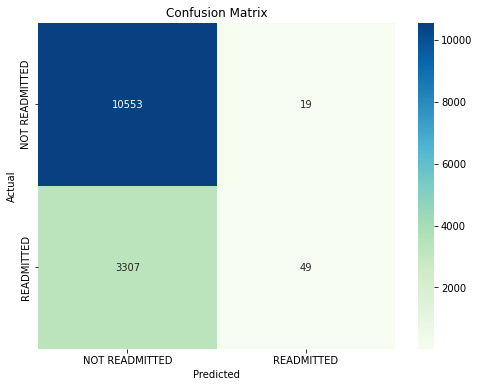

In [105]:
con_mat = confusion_matrix(Y_test, lr_model_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot = True, fmt = "d", cmap = "GnBu", xticklabels=["NOT READMITTED", "READMITTED"], yticklabels=["NOT READMITTED", "READMITTED"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

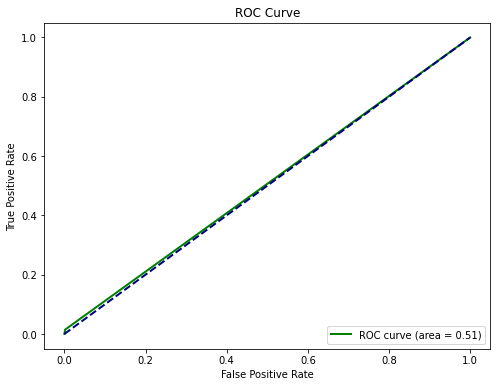

In [106]:
fpr, tpr, thresholds = roc_curve(Y_test, lr_model_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# DECISION TREE

In [107]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=5,min_samples_split = 2, min_samples_leaf = 1)
dt_model.fit(X_train, Y_train)
dt_model_pred = dt_model.predict(X_test)
dt_model_acc=acc(Y_test,dt_model_pred)

print("Accuracy : ",dt_model_acc)
print("Precision : ", precision_score(Y_test, dt_model_pred))
print("Recall : ", recall_score(Y_test, dt_model_pred))
print("F1-score : ", f1_score(Y_test, dt_model_pred))

Accuracy :  0.7613440551407237
Precision :  0.5563380281690141
Recall :  0.04707985697258641
F1-score :  0.0868131868131868


In [108]:
def objective(trial):
    max_depth_val = trial.suggest_int('max_depth', 1, 32)
    min_samples_split_val = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf_val = trial.suggest_int('min_samples_leaf', 1, 20)

    dt_model = DecisionTreeClassifier(max_depth=max_depth_val, min_samples_split=min_samples_split_val, min_samples_leaf=min_samples_leaf_val,random_state=42)
    dt_model.fit(X_train, Y_train)

    dt_model_pred = dt_model.predict(X_test)

    accuracy = acc(Y_test, dt_model_pred)
    return accuracy


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print(study.best_params)

print("Accuracy Score: " ,study.best_trial.value * 100)

[I 2023-11-11 13:50:47,181] A new study created in memory with name: no-name-32a0c5ac-e5ce-4294-b9f4-ab83b7eb97d7
[I 2023-11-11 13:50:47,875] Trial 0 finished with value: 0.6827254451464676 and parameters: {'max_depth': 28, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.6827254451464676.
[I 2023-11-11 13:50:48,110] Trial 1 finished with value: 0.7598363009764503 and parameters: {'max_depth': 8, 'min_samples_split': 17, 'min_samples_leaf': 14}. Best is trial 1 with value: 0.7598363009764503.
[I 2023-11-11 13:50:48,528] Trial 2 finished with value: 0.7205628948879954 and parameters: {'max_depth': 18, 'min_samples_split': 13, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.7598363009764503.
[I 2023-11-11 13:50:48,686] Trial 3 finished with value: 0.7609132682366456 and parameters: {'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 16}. Best is trial 3 with value: 0.7609132682366456.
[I 2023-11-11 13:50:48,867] Trial 4 finished with value: 0.7

[I 2023-11-11 13:50:58,155] Trial 39 finished with value: 0.7581849511774842 and parameters: {'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 9}. Best is trial 36 with value: 0.7619902354968409.
[I 2023-11-11 13:50:58,620] Trial 40 finished with value: 0.6977311889718553 and parameters: {'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 36 with value: 0.7619902354968409.
[I 2023-11-11 13:50:58,820] Trial 41 finished with value: 0.7619902354968409 and parameters: {'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 16}. Best is trial 36 with value: 0.7619902354968409.
[I 2023-11-11 13:50:59,045] Trial 42 finished with value: 0.7608414704192993 and parameters: {'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 16}. Best is trial 36 with value: 0.7619902354968409.
[I 2023-11-11 13:50:59,198] Trial 43 finished with value: 0.7590465249856404 and parameters: {'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 18}. Best is 

[I 2023-11-11 13:51:06,914] Trial 79 finished with value: 0.7590465249856404 and parameters: {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 17}. Best is trial 36 with value: 0.7619902354968409.
[I 2023-11-11 13:51:07,341] Trial 80 finished with value: 0.7200603101665709 and parameters: {'max_depth': 22, 'min_samples_split': 6, 'min_samples_leaf': 12}. Best is trial 36 with value: 0.7619902354968409.
[I 2023-11-11 13:51:07,533] Trial 81 finished with value: 0.760985066053992 and parameters: {'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 36 with value: 0.7619902354968409.
[I 2023-11-11 13:51:07,768] Trial 82 finished with value: 0.7608414704192993 and parameters: {'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 36 with value: 0.7619902354968409.
[I 2023-11-11 13:51:07,938] Trial 83 finished with value: 0.7609132682366456 and parameters: {'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 13}. Best is tr

{'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 16}
Accuracy Score:  76.19902354968409


In [109]:
dt_model = DecisionTreeClassifier(max_depth=6,min_samples_split = 3, min_samples_leaf = 16)
dt_model.fit(X_train, Y_train)
dt_model_pred = dt_model.predict(X_test)
dt_model_acc=acc(Y_test,dt_model_pred)

print("Accuracy : ",dt_model_acc)
print("Precision : ", precision_score(Y_test, dt_model_pred))
print("Recall : ", recall_score(Y_test, dt_model_pred))
print("F1-score : ", f1_score(Y_test, dt_model_pred))

Accuracy :  0.7619902354968409
Precision :  0.5953488372093023
Recall :  0.03814064362336114
F1-score :  0.07168860263231587


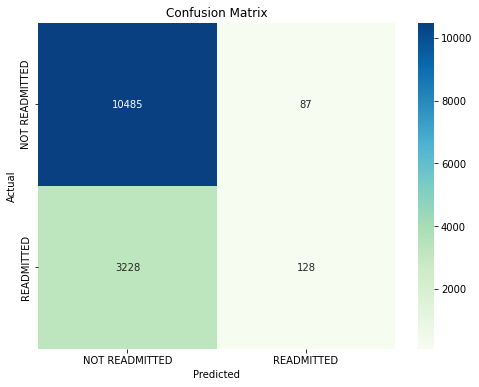

In [110]:
con_mat = confusion_matrix(Y_test, dt_model_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot = True, fmt = "d", cmap = "GnBu", xticklabels=["NOT READMITTED", "READMITTED"], yticklabels=["NOT READMITTED", "READMITTED"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

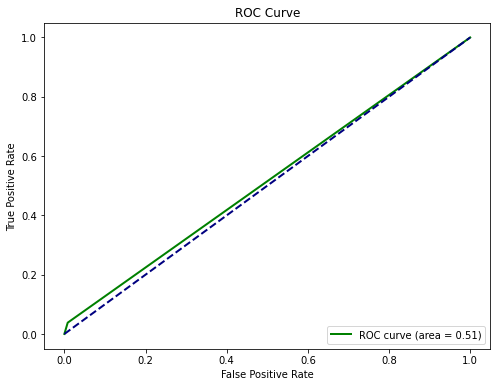

In [111]:
fpr, tpr, thresholds = roc_curve(Y_test, dt_model_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# RANDOM FOREST

In [112]:
RFC = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
RFC.fit(X_train, Y_train)
Y_pred = RFC.predict(X_test)

print("Accuracy : ", acc(Y_test,Y_pred)*100)
print("Precision : ", precision_score(Y_test, Y_pred))
print("Recall : ", recall_score(Y_test, Y_pred))
print("F1-score : ", f1_score(Y_test, Y_pred))

Accuracy :  76.12722573233773
Precision :  0.7123287671232876
Recall :  0.015494636471990465
F1-score :  0.03032954214056576


In [113]:
def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 50 , 250)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,random_state = 42)
    model.fit(X_train,Y_train)
    
    Y_pred = model.predict(X_test)

    s = acc(Y_test, Y_pred)
    
    return s

study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)

print(study.best_params)

print("Accuracy Score: " ,study.best_trial.value * 100)

[I 2023-11-11 13:53:42,076] A new study created in memory with name: no-name-33eec426-854e-46be-9680-bee6ccd6a75f
[I 2023-11-11 13:53:44,407] Trial 0 finished with value: 0.7591183228029867 and parameters: {'n_estimators': 78, 'max_depth': 6}. Best is trial 0 with value: 0.7591183228029867.
[I 2023-11-11 13:53:55,114] Trial 1 finished with value: 0.762421022400919 and parameters: {'n_estimators': 85, 'max_depth': 26}. Best is trial 1 with value: 0.762421022400919.
[I 2023-11-11 13:53:58,102] Trial 2 finished with value: 0.7590465249856404 and parameters: {'n_estimators': 138, 'max_depth': 5}. Best is trial 1 with value: 0.762421022400919.
[I 2023-11-11 13:54:05,084] Trial 3 finished with value: 0.7621338311315337 and parameters: {'n_estimators': 74, 'max_depth': 25}. Best is trial 1 with value: 0.762421022400919.
[I 2023-11-11 13:54:14,001] Trial 4 finished with value: 0.7599798966111431 and parameters: {'n_estimators': 235, 'max_depth': 9}. Best is trial 1 with value: 0.76242102240091

[I 2023-11-11 14:02:19,568] Trial 45 finished with value: 0.7642159678345778 and parameters: {'n_estimators': 190, 'max_depth': 21}. Best is trial 31 with value: 0.7645749569213096.
[I 2023-11-11 14:02:34,388] Trial 46 finished with value: 0.7634979896611143 and parameters: {'n_estimators': 180, 'max_depth': 23}. Best is trial 31 with value: 0.7645749569213096.
[I 2023-11-11 14:02:55,966] Trial 47 finished with value: 0.7637133831131534 and parameters: {'n_estimators': 249, 'max_depth': 25}. Best is trial 31 with value: 0.7645749569213096.
[I 2023-11-11 14:03:08,528] Trial 48 finished with value: 0.762421022400919 and parameters: {'n_estimators': 169, 'max_depth': 19}. Best is trial 31 with value: 0.7645749569213096.
[I 2023-11-11 14:03:20,848] Trial 49 finished with value: 0.7628518093049971 and parameters: {'n_estimators': 135, 'max_depth': 28}. Best is trial 31 with value: 0.7645749569213096.
[I 2023-11-11 14:03:29,367] Trial 50 finished with value: 0.7619902354968409 and parameters

[I 2023-11-11 14:11:09,204] Trial 91 finished with value: 0.7644313612866169 and parameters: {'n_estimators': 121, 'max_depth': 22}. Best is trial 31 with value: 0.7645749569213096.
[I 2023-11-11 14:11:19,025] Trial 92 finished with value: 0.7649339460080413 and parameters: {'n_estimators': 132, 'max_depth': 22}. Best is trial 92 with value: 0.7649339460080413.
[I 2023-11-11 14:11:29,427] Trial 93 finished with value: 0.7639287765651924 and parameters: {'n_estimators': 129, 'max_depth': 24}. Best is trial 92 with value: 0.7649339460080413.
[I 2023-11-11 14:11:39,616] Trial 94 finished with value: 0.7637851809304997 and parameters: {'n_estimators': 133, 'max_depth': 23}. Best is trial 92 with value: 0.7649339460080413.
[I 2023-11-11 14:11:51,465] Trial 95 finished with value: 0.7622774267662263 and parameters: {'n_estimators': 160, 'max_depth': 20}. Best is trial 92 with value: 0.7649339460080413.
[I 2023-11-11 14:12:02,642] Trial 96 finished with value: 0.7640723721998851 and parameter

{'n_estimators': 132, 'max_depth': 22}
Accuracy Score:  76.49339460080414


In [114]:
RFC = RandomForestClassifier(n_estimators=151, max_depth = 21)
RFC.fit(X_train, Y_train)
Y_pred = RFC.predict(X_test)

print("Accuracy : ", acc(Y_test,Y_pred)*100)
print("Precision : ", precision_score(Y_test, Y_pred))
print("Recall : ", recall_score(Y_test, Y_pred))
print("F1-score : ", f1_score(Y_test, Y_pred))

Accuracy :  76.2851809304997
Precision :  0.5654320987654321
Recall :  0.06823599523241955
F1-score :  0.12177612337144376


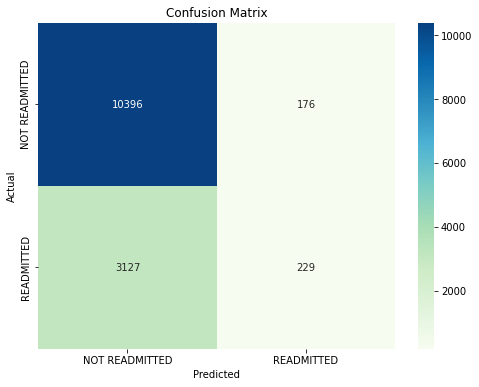

In [115]:
con_mat = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot = True, fmt = "d", cmap = "GnBu", xticklabels=["NOT READMITTED", "READMITTED"], yticklabels=["NOT READMITTED", "READMITTED"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

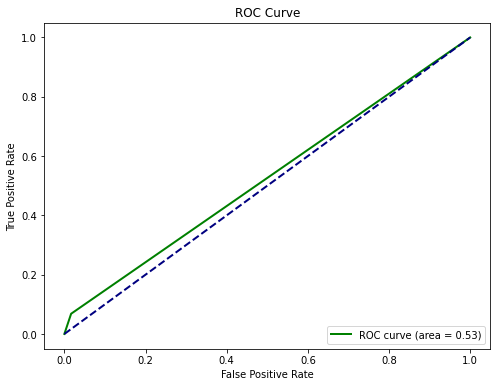

In [116]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# XGBoost Classifier

In [120]:
XGB = XGBClassifier(n_estimators=100,max_depth=3, learning_rate=0.1, objective='binary:logistic', random_state =42)
XGB.fit(X_train, Y_train)
Y_pred = XGB.predict(X_test)
print("Accuracy : ", acc(Y_test,Y_pred)*100)
print("Precision : ", precision_score(Y_test, Y_pred))
print("Recall : ", recall_score(Y_test, Y_pred))
print("F1-score : ", f1_score(Y_test, Y_pred))

Accuracy :  76.43595634692706
Precision :  0.625
Recall :  0.05512514898688915
F1-score :  0.1013143483023001


In [121]:
def objective(trial):
    
    n_estimators= trial.suggest_int('n_estimators', 50, 250)
    max_depth= trial.suggest_int('max_depth', 5, 30)
    learning_rate= trial.suggest_float('learning_rate', 0.01, 0.1)
    objective= trial.suggest_categorical('objective', ['binary:logistic', 'binary:logitraw', 'binary:hinge'])
    
    model = XGBClassifier(n_estimators = n_estimators, max_depth = max_depth, objective=objective, 
                              learning_rate=learning_rate,random_state=42)
    model.fit(X_train,Y_train)
    
    Y_pred = model.predict(X_test)

    s = acc(Y_test, Y_pred)
    
    return s

study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)

print(study.best_params)

print("Accuracy Score: " ,study.best_trial.value * 100)

[I 2023-11-11 15:07:19,321] A new study created in memory with name: no-name-37270f7d-8f1c-415e-8e1d-4cca721f2896
[I 2023-11-11 15:07:50,881] Trial 0 finished with value: 0.7612722573233773 and parameters: {'n_estimators': 245, 'max_depth': 8, 'learning_rate': 0.07745652158083692, 'objective': 'binary:logistic'}. Best is trial 0 with value: 0.7612722573233773.
[I 2023-11-11 15:08:32,555] Trial 1 finished with value: 0.7541642734060885 and parameters: {'n_estimators': 115, 'max_depth': 19, 'learning_rate': 0.01589806025151258, 'objective': 'binary:logistic'}. Best is trial 0 with value: 0.7612722573233773.
[I 2023-11-11 15:09:57,789] Trial 2 finished with value: 0.7454767375071798 and parameters: {'n_estimators': 198, 'max_depth': 24, 'learning_rate': 0.07800144487532523, 'objective': 'binary:logistic'}. Best is trial 0 with value: 0.7612722573233773.
[I 2023-11-11 15:10:23,428] Trial 3 finished with value: 0.7627800114876507 and parameters: {'n_estimators': 157, 'max_depth': 10, 'learn

KeyboardInterrupt: 

In [122]:
XGB = XGBClassifier(n_estimators=204,max_depth=5, learning_rate=0.09787513975928733, objective='binary:logistic', random_state =42)
XGB.fit(X_train, Y_train)
Y_pred = XGB.predict(X_test)
print("Accuracy : ", acc(Y_test,Y_pred)*100)
print("Precision : ", precision_score(Y_test, Y_pred))
print("Recall : ", recall_score(Y_test, Y_pred))
print("F1-score : ", f1_score(Y_test, Y_pred))

Accuracy :  76.39287765651925
Precision :  0.5584192439862543
Recall :  0.0968414779499404
F1-score :  0.16505840528186896


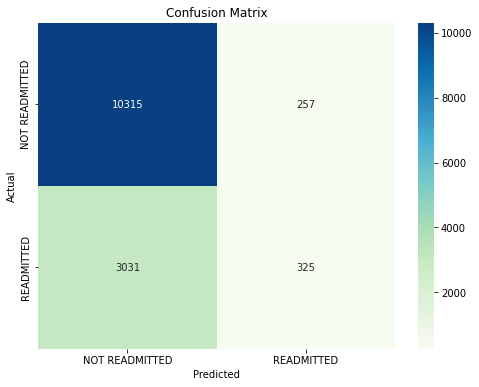

In [123]:
con_mat = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot = True, fmt = "d", cmap = "GnBu", xticklabels=["NOT READMITTED", "READMITTED"], yticklabels=["NOT READMITTED", "READMITTED"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

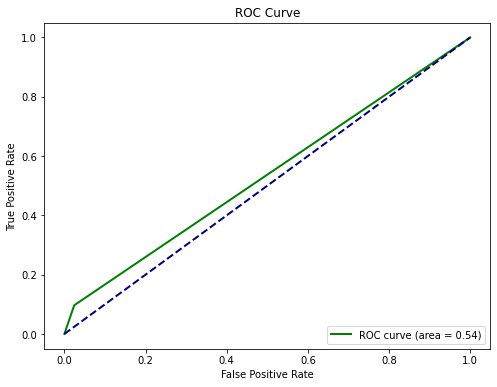

In [124]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()